In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


# Frequency distribution plot of the dataset

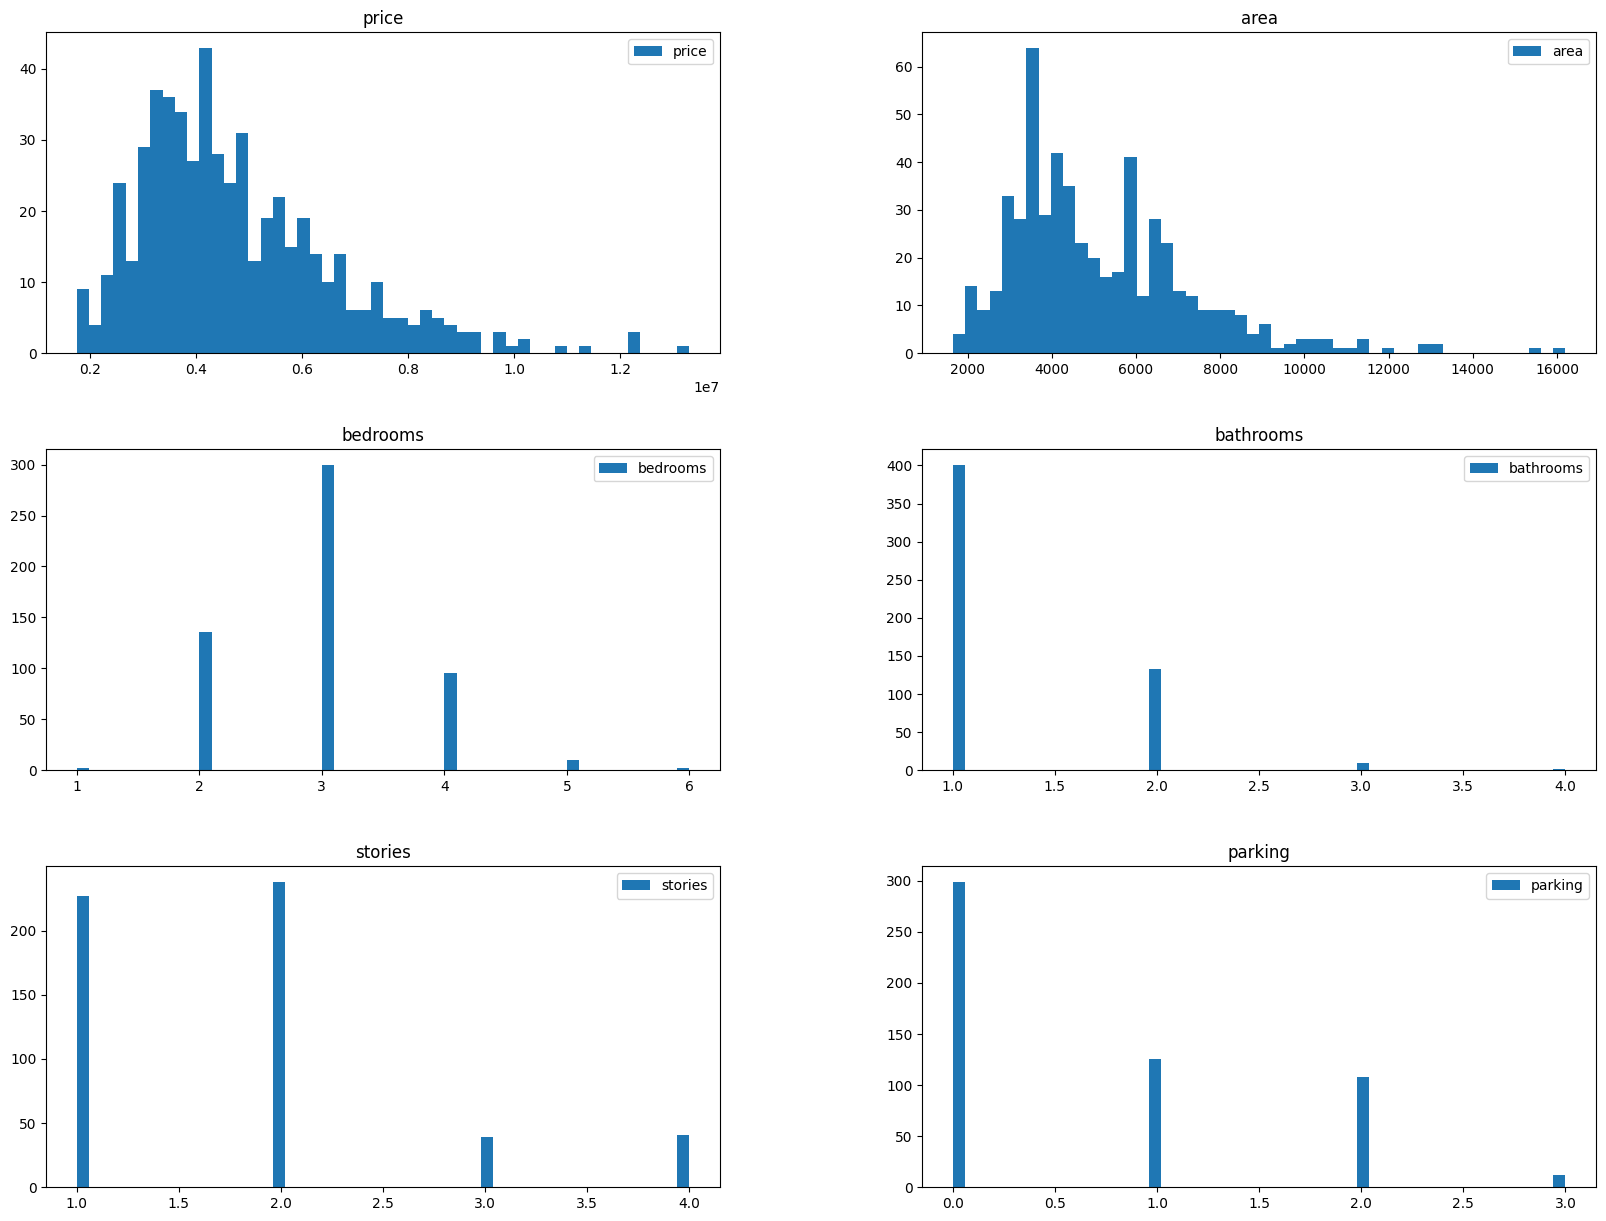

In [4]:
data.hist(bins=50, figsize=(20,15),grid=False,legend=True)

plt.show()

# Plot with Kernel Density Estimation (KDE) using seaborn

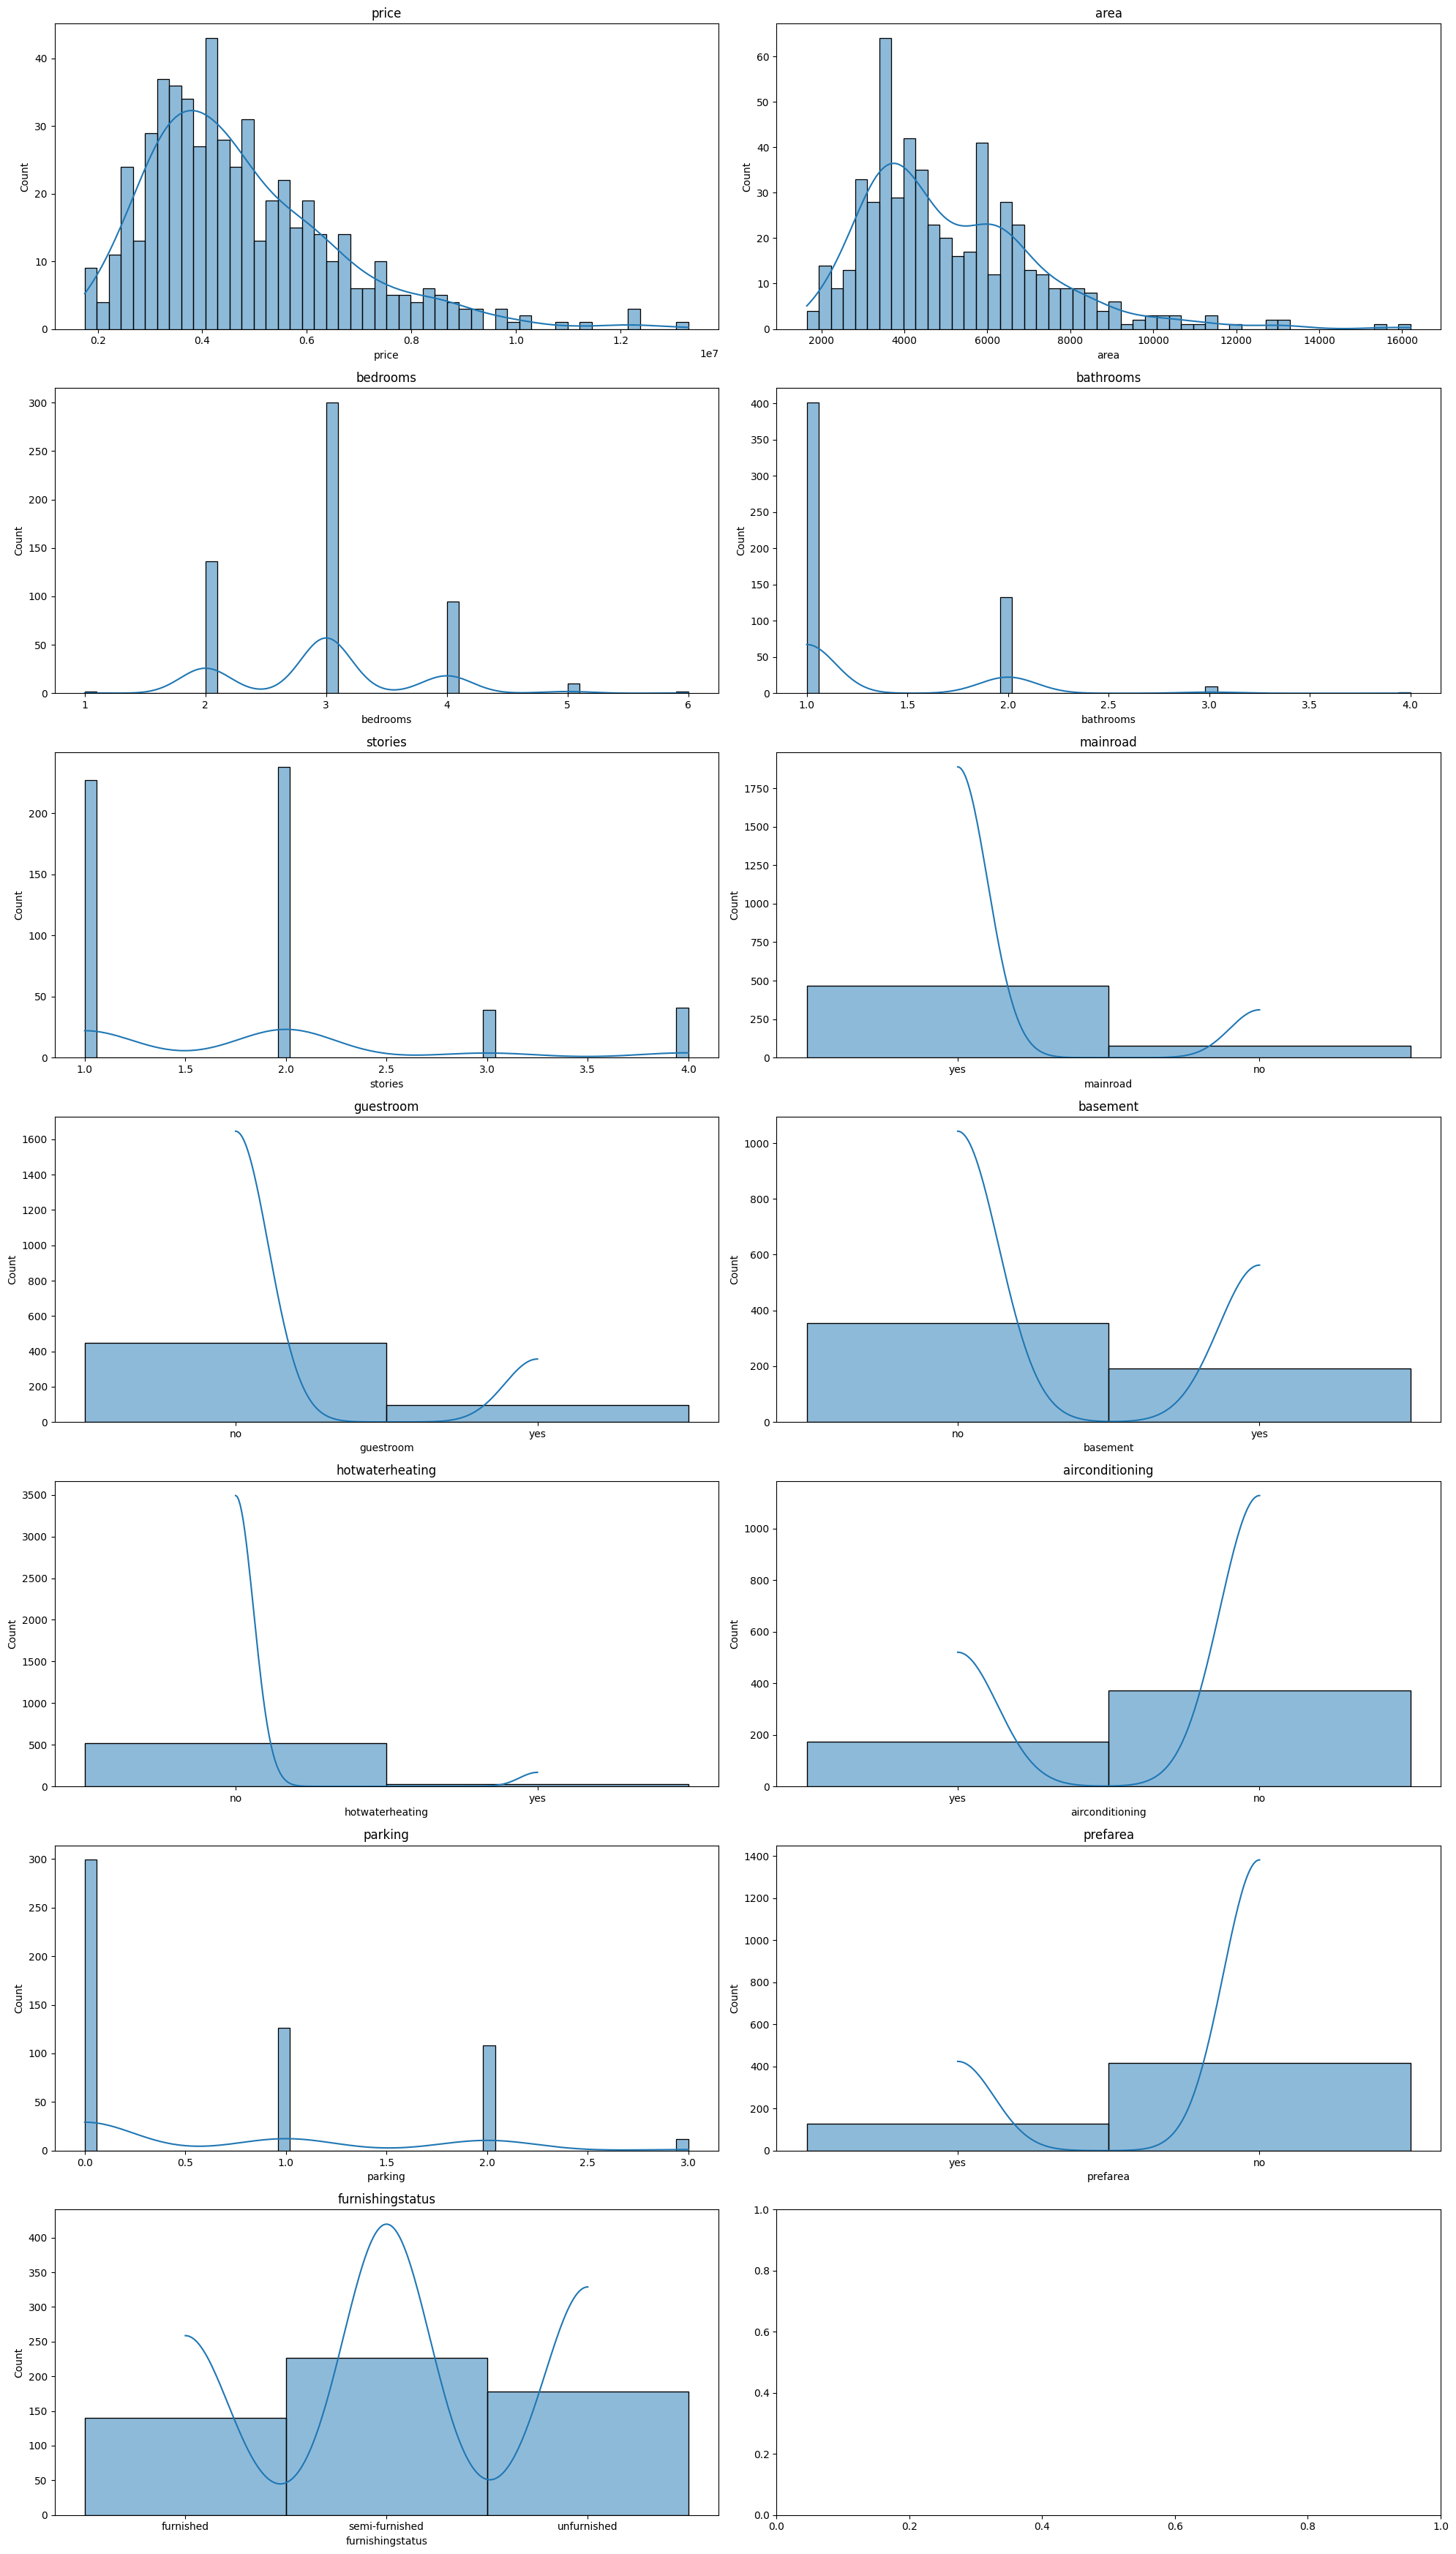

In [5]:


# Get a list of column names (assuming these are the variables you want to plot)
variables_to_plot = data.columns

# Set the number of rows and columns for the subplots
num_rows = int(len(variables_to_plot)/2)+1
num_cols = 2  # You can adjust the number of columns as needed

# Create a figure and axis for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each variable and create histograms with KDE plots
for i, variable in enumerate(variables_to_plot):
    sns.histplot(data[variable], bins=50, kde=True, ax=axes[i], label=variable)  # Label each plot with the variable name
    axes[i].set_title(variable)
    axes[i].grid(False)



# Adjust the layout of the subplots
plt.tight_layout()

# Show the plots
plt.show()


# Individual independent variables plots with dependent variable

<Axes: xlabel='area', ylabel='price'>

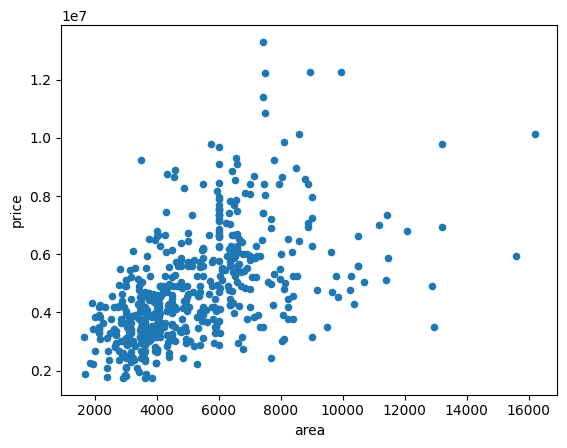

In [6]:

data.plot(kind="scatter", x="area", y="price")

In [7]:
X = data.iloc[:,1:]
y = data.iloc[:,1]

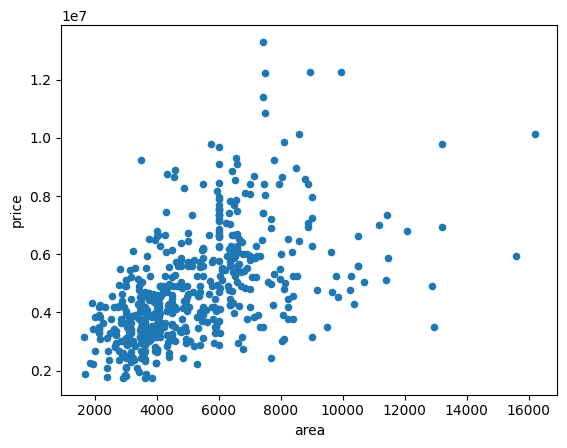

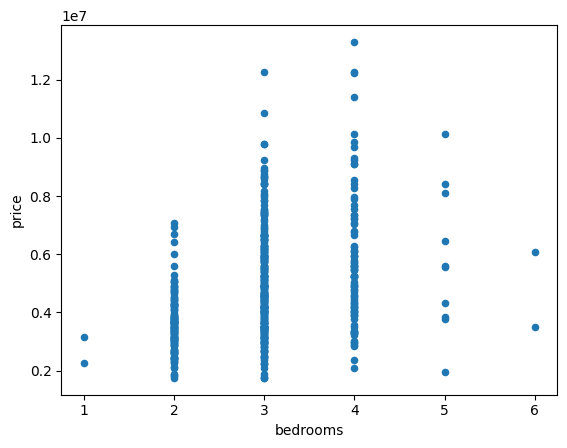

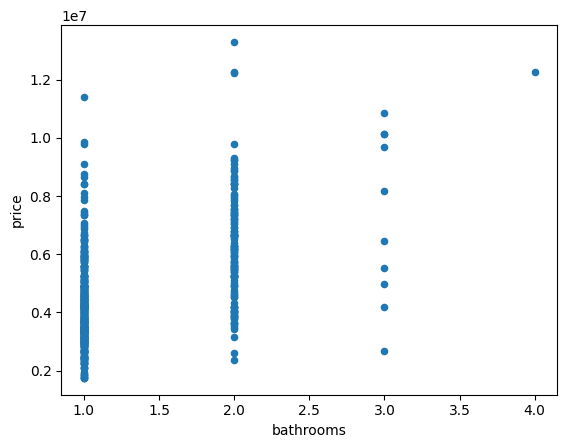

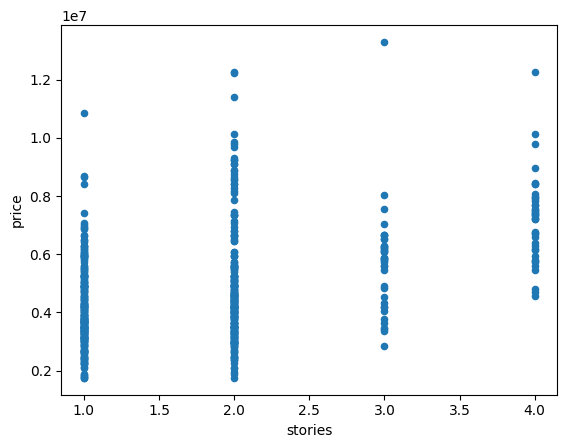

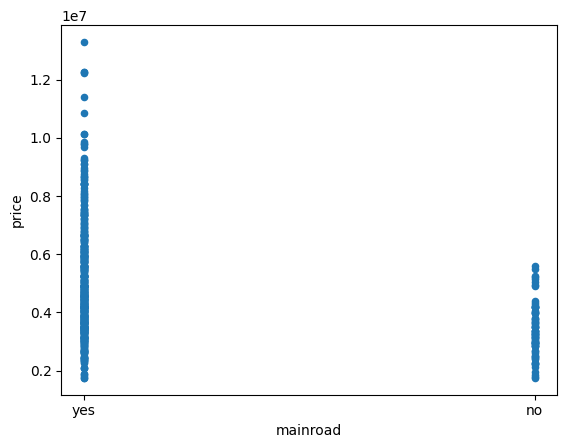

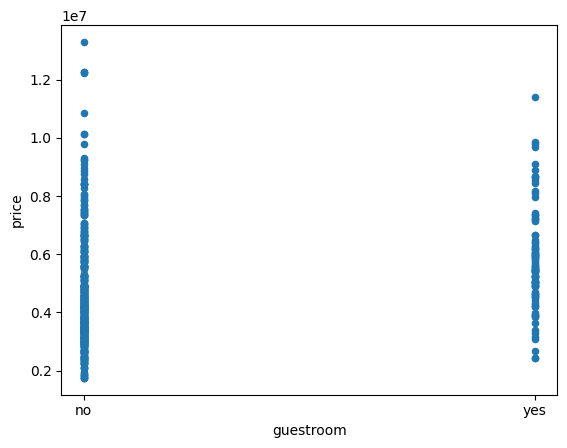

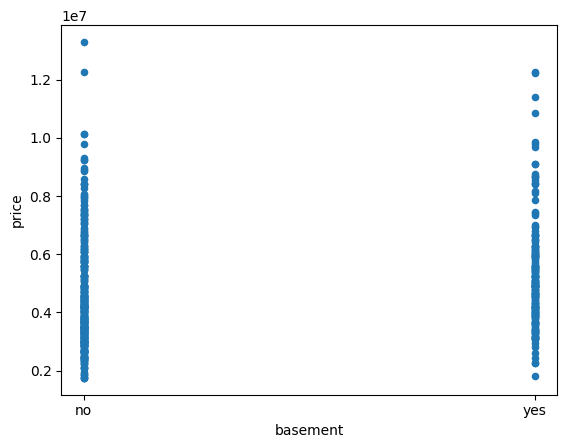

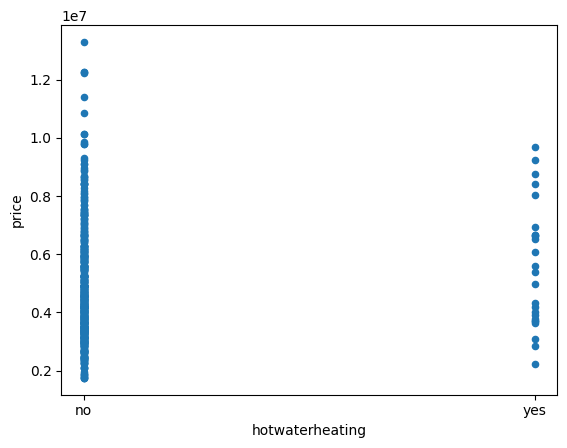

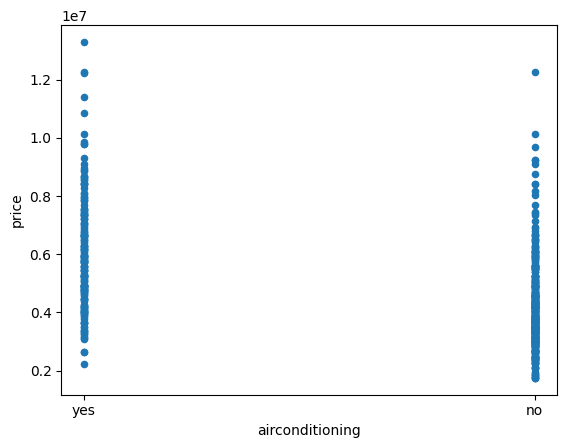

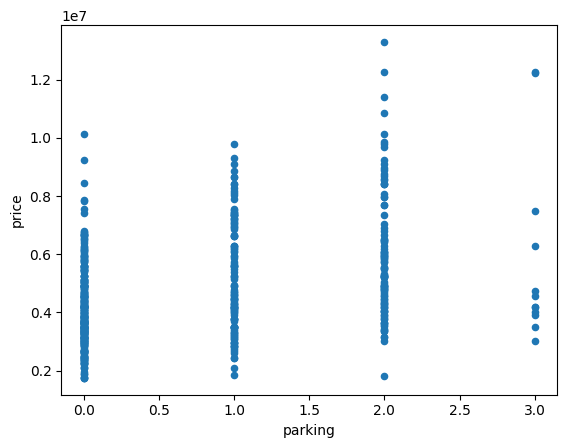

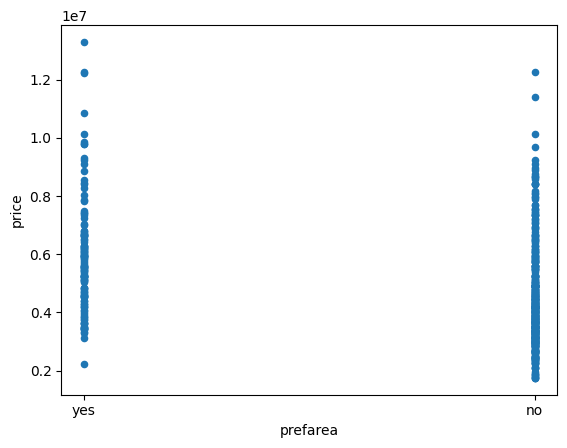

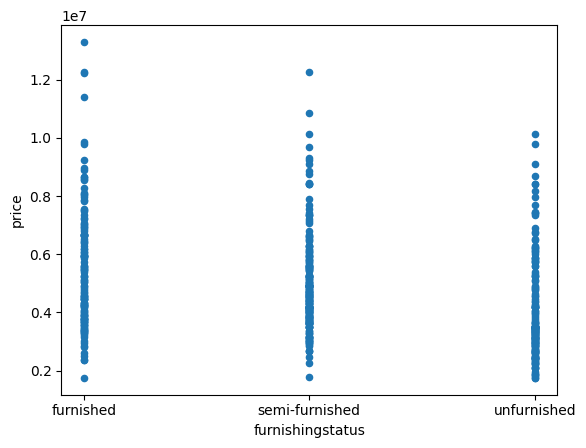

In [8]:
for feature in X.columns:
    data.plot(kind="scatter", x=feature, y="price")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# ..............................Dataset Pre-processing...............................

## Handling Categorical Features using One Hot Encoding Approach

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
# Separate categorical and numerical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create transformers for each type of column
categorical_transformer = OneHotEncoder(sparse_output=False)
numerical_transformer = StandardScaler()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),
        ('numerical', numerical_transformer, numerical_columns)
    ])

# Fit and transform the data
transformed_data = preprocessor.fit_transform(data)

# Get the feature names for the encoded categorical features
# encoded_categorical_feature_names = categorical_transformer.get_feature_names_out(categorical_columns)
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame with named columns
# columns = list(encoded_categorical_feature_names) + numerical_columns

# transformed_data = pd.DataFrame(transformed_data, columns=columns)

transformed_data = pd.DataFrame(transformed_data, columns=feature_names)
# Add the last column for the label "price"
transformed_data['price'] = data['price']

# Display the final DataFrame and export to excel
print(transformed_data)
transformed_data.to_excel("Transformed_dataset.xlsx",index=False)

     categorical__mainroad_no  categorical__mainroad_yes  \
0                         0.0                        1.0   
1                         0.0                        1.0   
2                         0.0                        1.0   
3                         0.0                        1.0   
4                         0.0                        1.0   
..                        ...                        ...   
540                       0.0                        1.0   
541                       1.0                        0.0   
542                       0.0                        1.0   
543                       1.0                        0.0   
544                       0.0                        1.0   

     categorical__guestroom_no  categorical__guestroom_yes  \
0                          1.0                         0.0   
1                          1.0                         0.0   
2                          1.0                         0.0   
3                          1.0 

## Histogram plot after handling categorical features and normalization

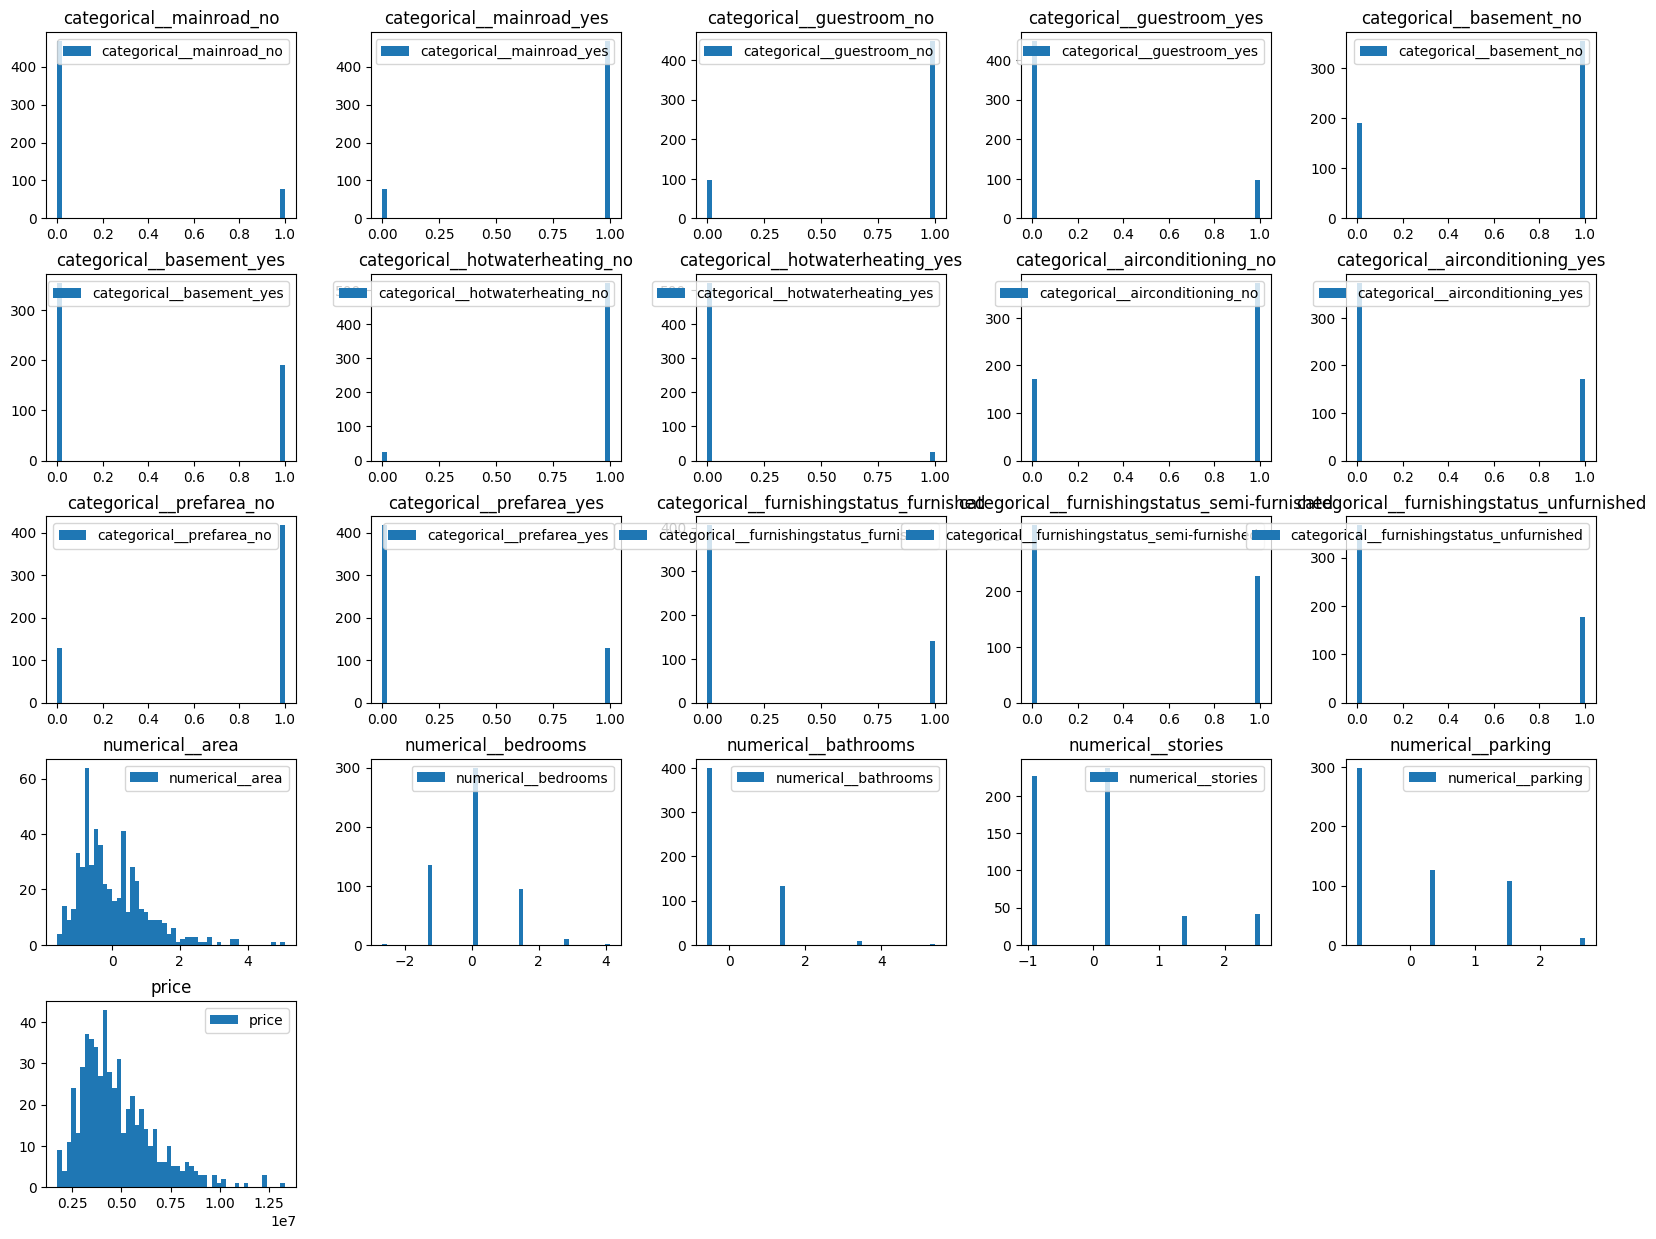

In [13]:
transformed_data.hist(bins=50, figsize=(20,15),grid=False,legend=True)

plt.show()

## Histogram with KDE plot

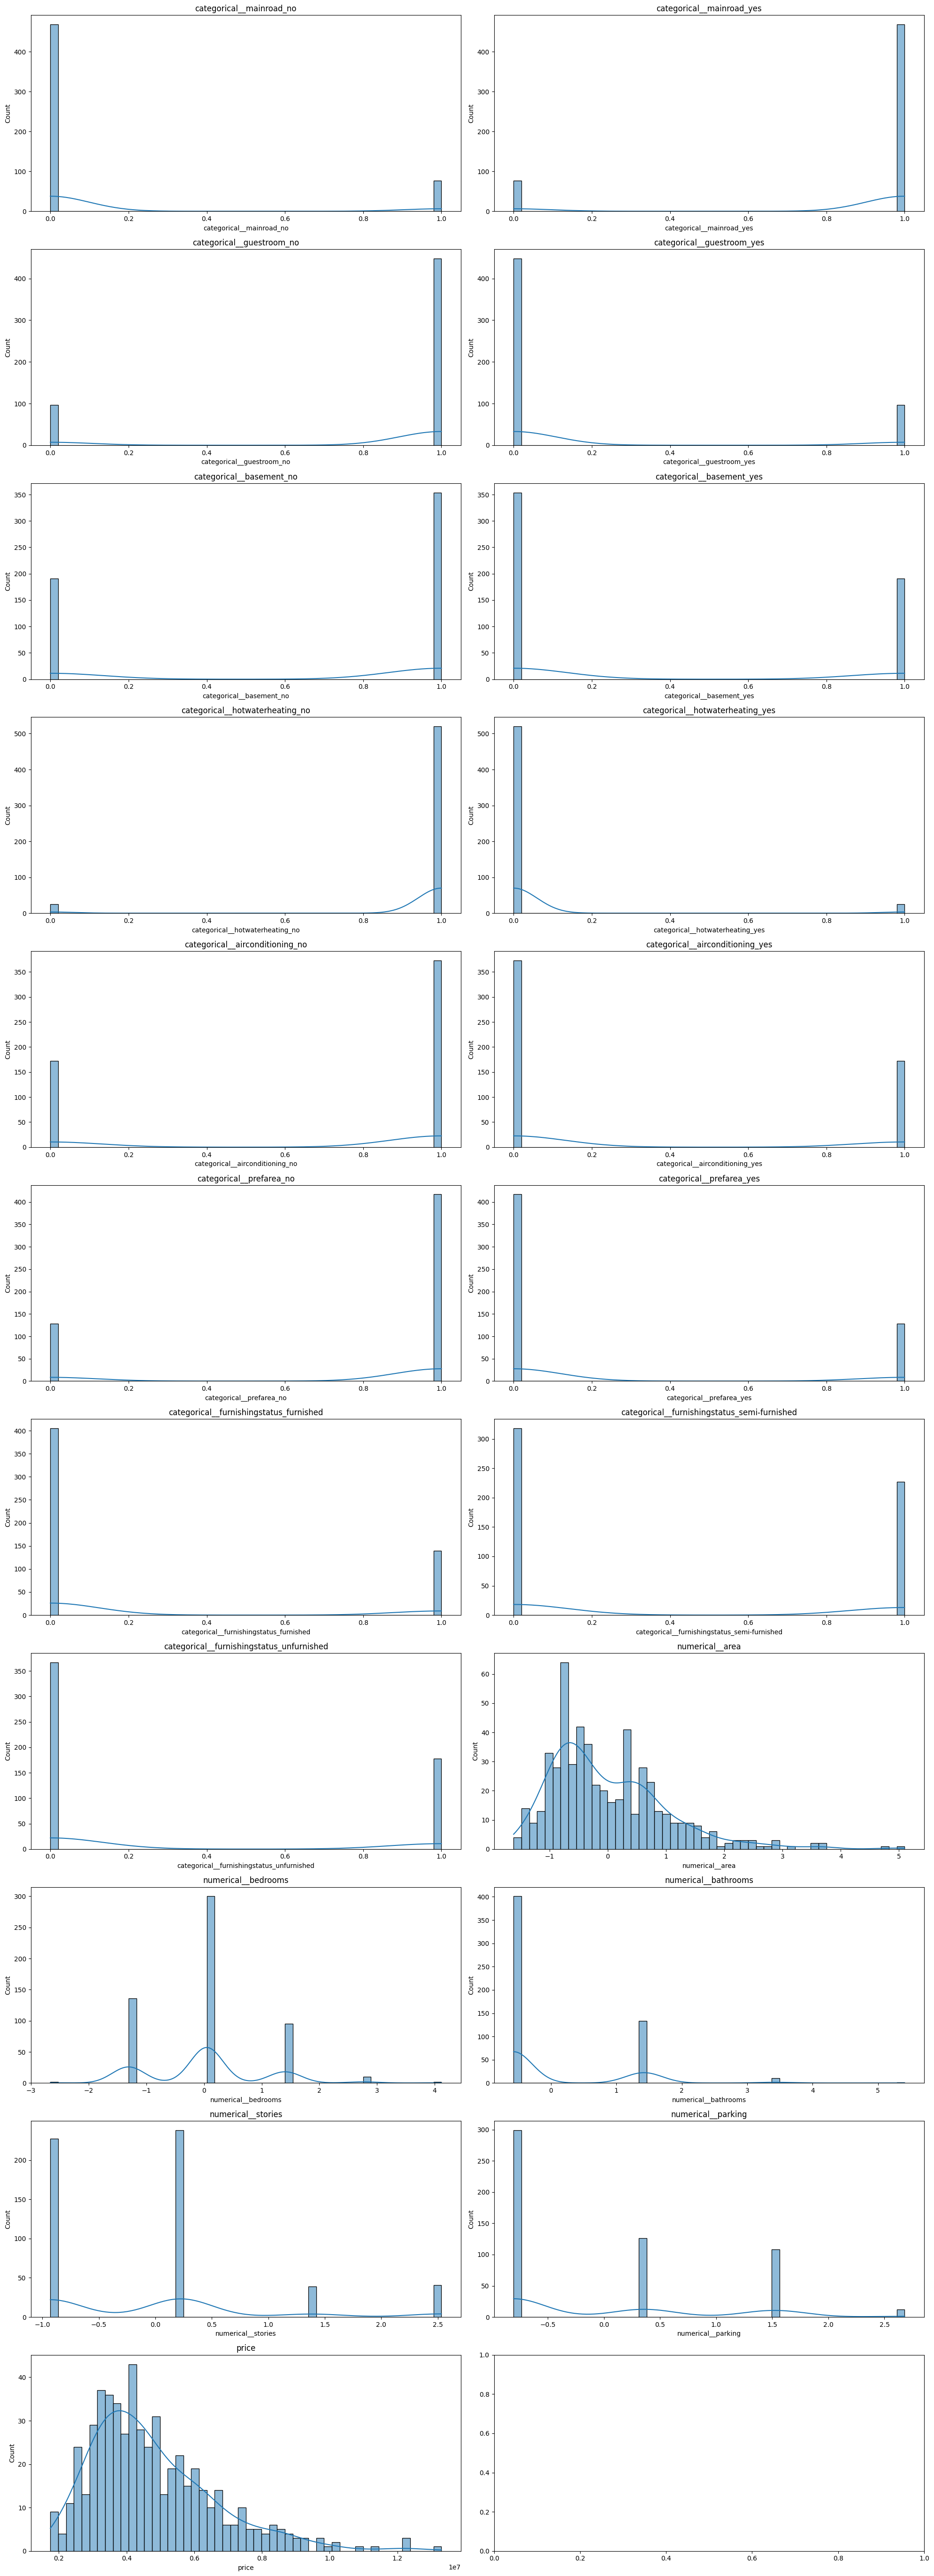

In [14]:


# Get a list of column names (assuming these are the variables you want to plot)
variables_to_plot = transformed_data.columns

# Set the number of rows and columns for the subplots
num_rows = int(len(variables_to_plot)/2)+1
num_cols = 2  # You can adjust the number of columns as needed

# Create a figure and axis for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each variable and create histograms with KDE plots
for i, variable in enumerate(variables_to_plot):
    sns.histplot(transformed_data[variable], bins=50, kde=True, ax=axes[i], label=variable)  # Label each plot with the variable name
    axes[i].set_title(variable)
    axes[i].grid(False)



# Adjust the layout of the subplots
plt.tight_layout()

# Show the plots
plt.show()


In [15]:
transformed_data.describe().T

,count,mean,std,min,25%,50%,75%,max
categorical__mainroad_no,545.0,1.412844e-01,3.486347e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
categorical__mainroad_yes,545.0,8.587156e-01,3.486347e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
categorical__guestroom_no,545.0,8.220183e-01,3.828487e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
categorical__guestroom_yes,545.0,1.779817e-01,3.828487e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
categorical__basement_no,545.0,6.495413e-01,4.775519e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
categorical__basement_yes,545.0,3.504587e-01,4.775519e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
categorical__hotwaterheating_no,545.0,9.541284e-01,2.093987e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
categorical__hotwaterheating_yes,545.0,4.587156e-02,2.093987e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
categorical__airconditioning_no,545.0,6.844037e-01,4.651799e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
categorical__airconditioning_yes,545.0,3.155963e-01,4.651799e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [16]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   categorical__mainroad_no                      545 non-null    float64
 1   categorical__mainroad_yes                     545 non-null    float64
 2   categorical__guestroom_no                     545 non-null    float64
 3   categorical__guestroom_yes                    545 non-null    float64
 4   categorical__basement_no                      545 non-null    float64
 5   categorical__basement_yes                     545 non-null    float64
 6   categorical__hotwaterheating_no               545 non-null    float64
 7   categorical__hotwaterheating_yes              545 non-null    float64
 8   categorical__airconditioning_no               545 non-null    float64
 9   categorical__airconditioning_yes              545 non-null    flo

## Pearson correlation plot

* The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables. When one variable changes, the other variable changes in the same direction.

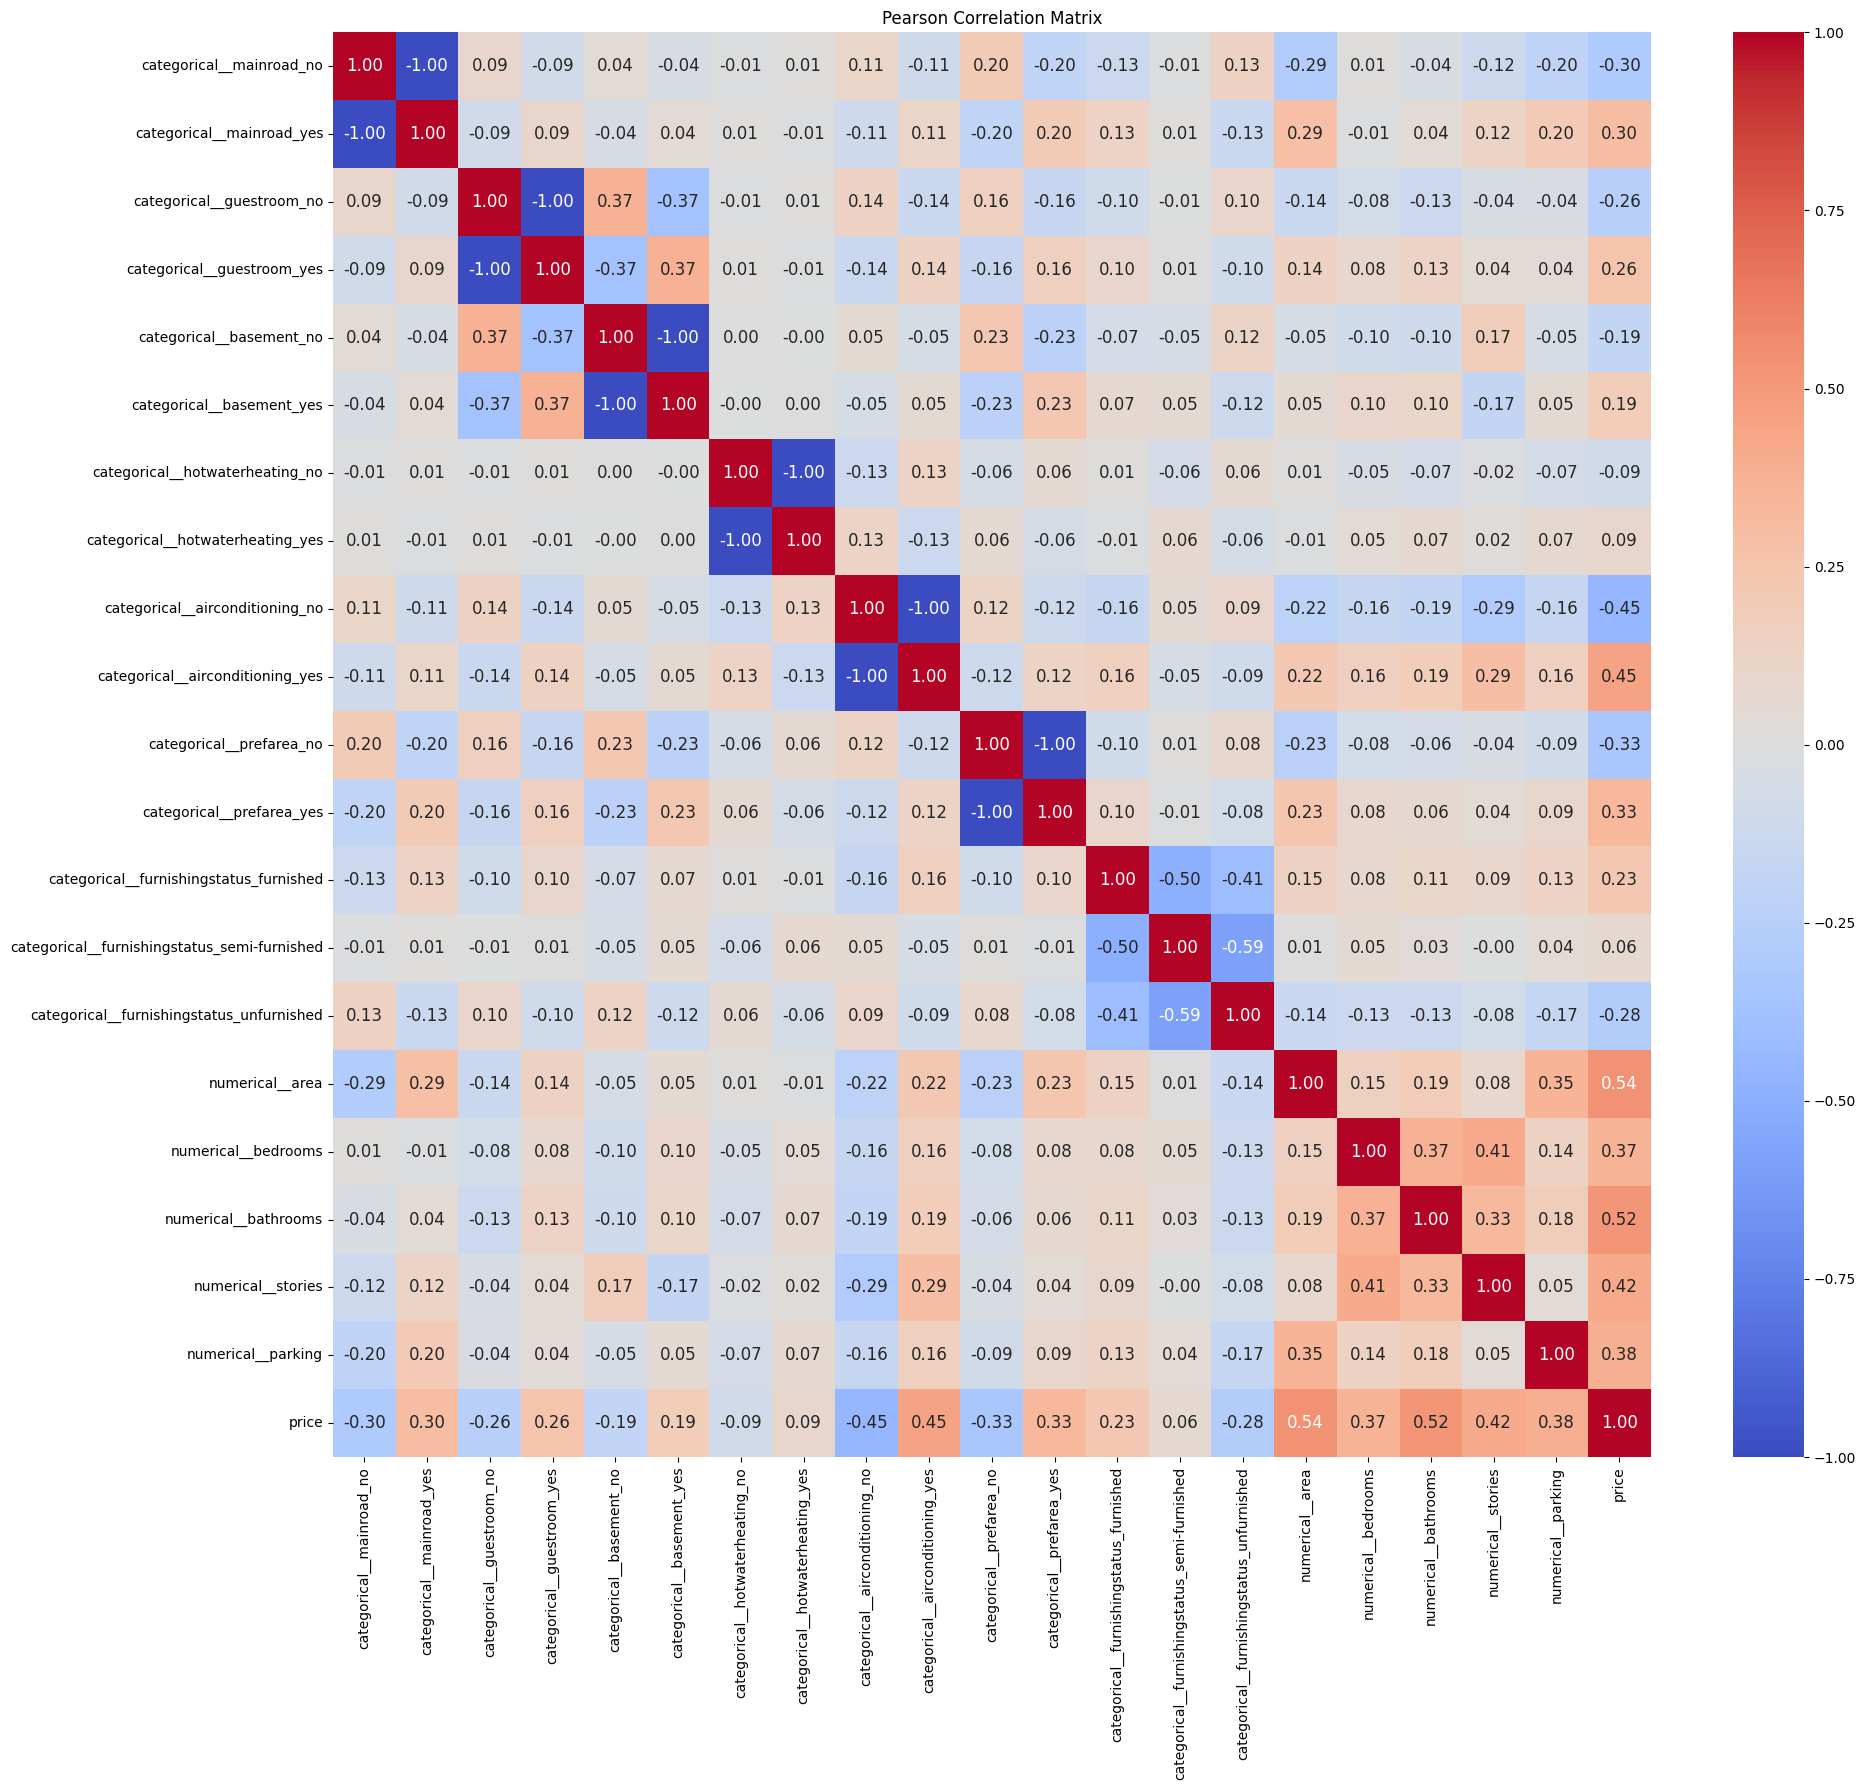

In [17]:
# Calculate the Pearson correlation matrix
correlation_matrix = transformed_data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Pearson Correlation Matrix')
# Adjust the layout of the plot
plt.tight_layout()
plt.show()

In [18]:
transformed_data.head()

,categorical__mainroad_no,categorical__mainroad_yes,categorical__guestroom_no,categorical__guestroom_yes,categorical__basement_no,categorical__basement_yes,categorical__hotwaterheating_no,categorical__hotwaterheating_yes,categorical__airconditioning_no,categorical__airconditioning_yes,...,categorical__prefarea_yes,categorical__furnishingstatus_furnished,categorical__furnishingstatus_semi-furnished,categorical__furnishingstatus_unfurnished,numerical__area,numerical__bedrooms,numerical__bathrooms,numerical__stories,numerical__parking,price
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.046726,1.403419,1.421812,1.378217,1.517692,13300000
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.757010,1.403419,5.405809,2.532024,2.679409,12250000
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,2.218232,0.047278,1.421812,0.224410,1.517692,12250000
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.083624,1.403419,1.421812,0.224410,2.679409,12215000
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.046726,1.403419,-0.570187,0.224410,1.517692,11410000


## Handling outliers in a dataset

* Handling outliers in a dataset is an important step in data preprocessing. Outliers can significantly affect the performance of machine learning models. Here are steps to check and handle outliers in your dataset:

Identify Outliers:

Visual Inspection: Create box plots, histograms, or scatter plots to visualize the data and look for any data points that appear significantly different from the majority of the data.
Use Statistical Methods: Calculate summary statistics like mean, standard deviation, quartiles (25th and 75th percentiles), and use them to identify data points that are far from the mean or median.
Detect Outliers:

Z-Score: Calculate the Z-score for each data point and flag those with Z-scores exceeding a certain threshold (e.g., Z-score > 3 or < -3).
IQR (Interquartile Range): Calculate the IQR for a variable and identify data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
Handle Outliers:

Remove Outliers: You can choose to remove outliers from your dataset. However, this should be done carefully, as it may result in loss of information.
Transform Data: Apply transformations like log transformation, square root transformation, or Box-Cox transformation to make the data more normally distributed and reduce the impact of outliers.
Cap Outliers: Set a cap or threshold for extreme values. For example, you can replace values above or below a certain threshold with the threshold value.
In this dataset, IQR method and capping the outliers are employed:

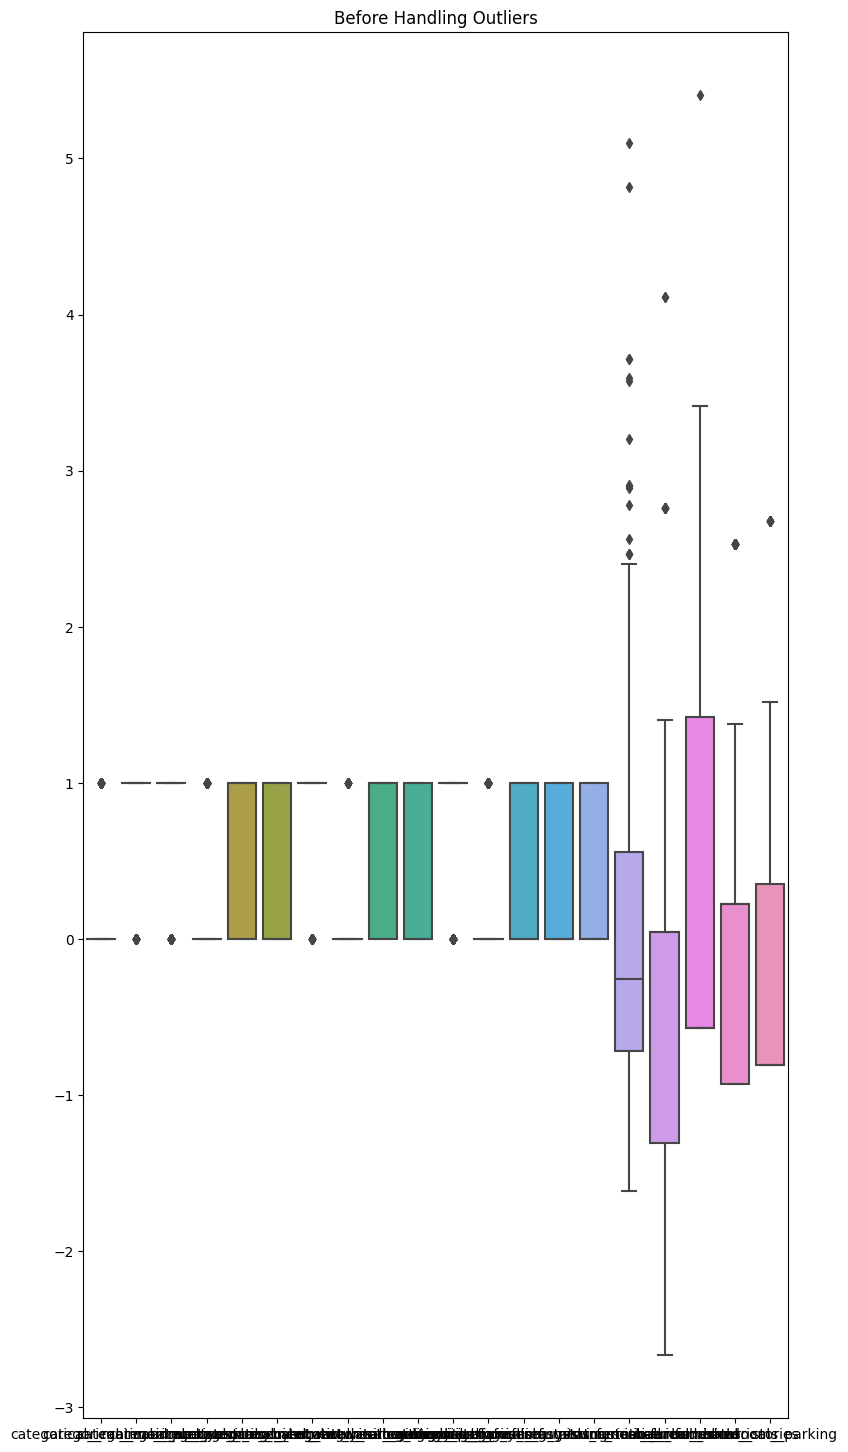

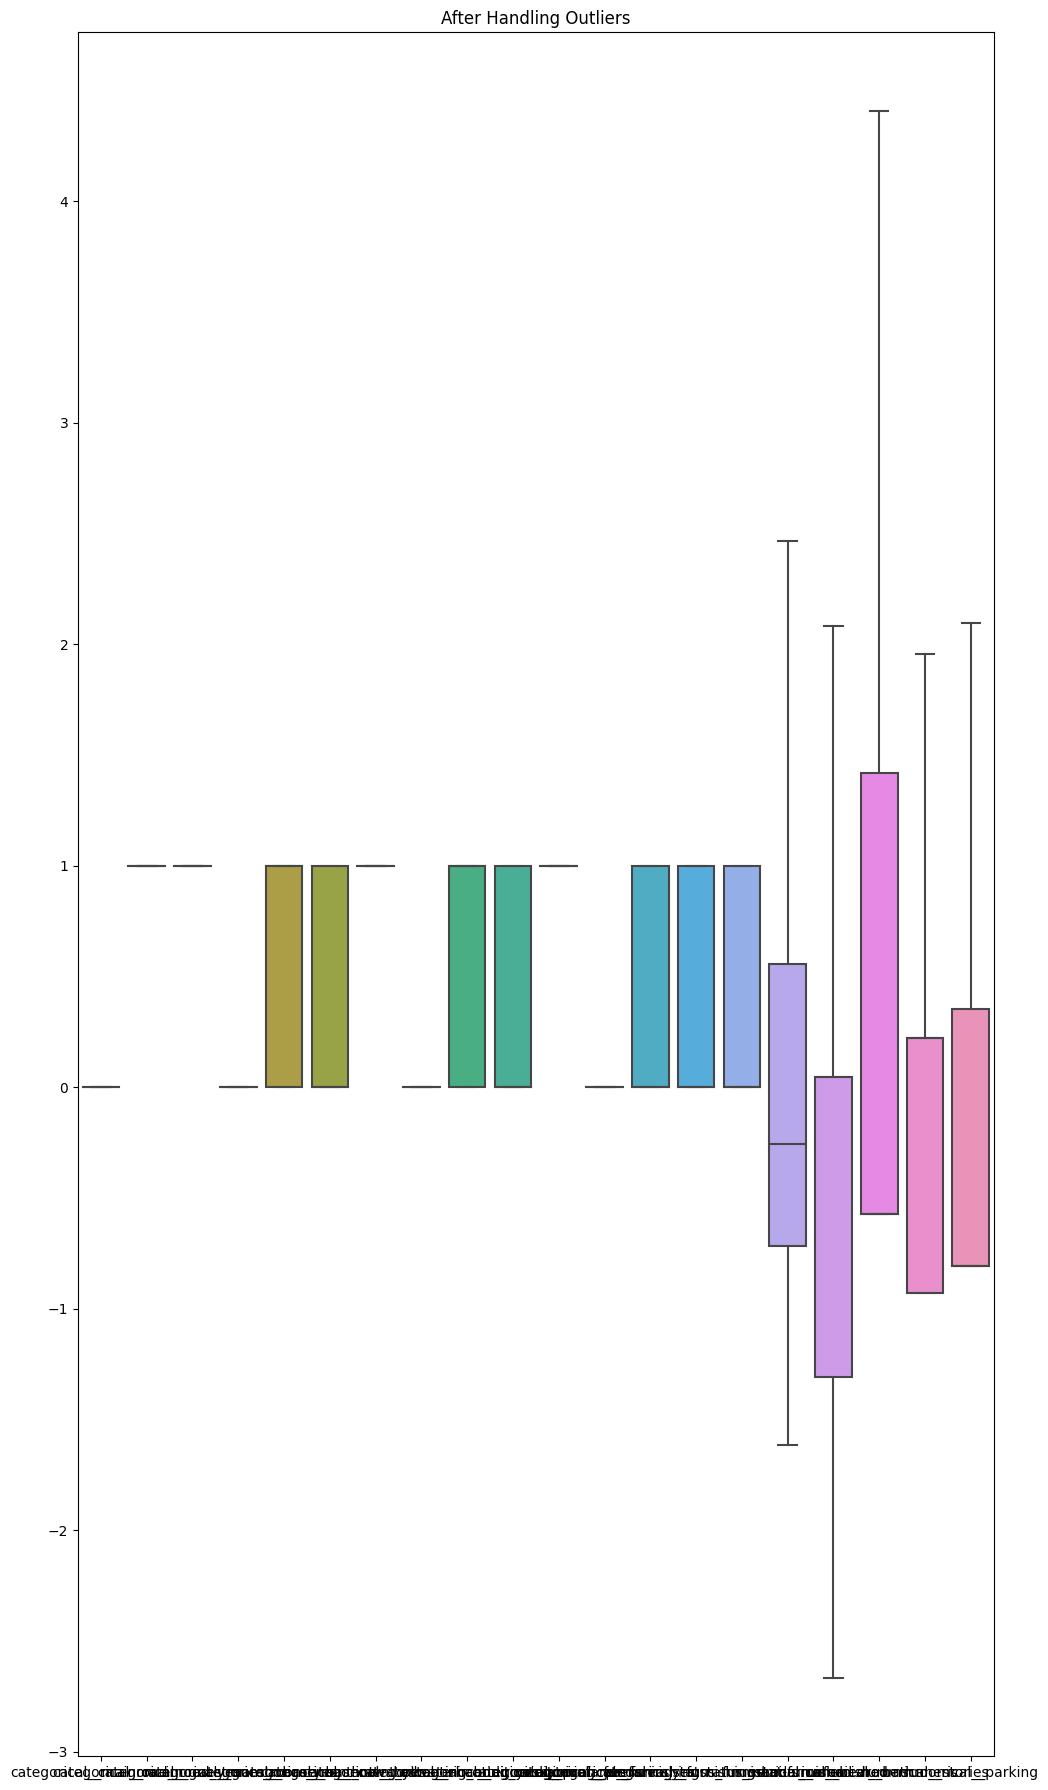

In [19]:
# Step 1: Visualize outliers using box plots
plt.figure(figsize=(20, 18))
plt.subplot(1, 2, 1)
sns.boxplot(data=transformed_data.iloc[:,:-1], orient='vertical')
plt.title('Before Handling Outliers')
plt.show()

# Step 2: Handle outliers for all features and label
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return column.clip(lower=lower_limit, upper=upper_limit)

# Apply outlier handling function to all columns (features and label)
for col in transformed_data.columns:
    if col != 'price':  # Skip handling outliers for the 'price' column
        transformed_data[col] = handle_outliers(transformed_data[col])

# Step 3: Visualize outliers again after handling
plt.figure(figsize=(20, 18))
plt.subplot(1, 2, 2)
sns.boxplot(data=transformed_data.iloc[:,:-1], orient='vertical')
plt.title('After Handling Outliers')

plt.tight_layout()
plt.show()

# Models and performance evalution with k-fold cross validations

In [20]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

# %matplotlib inline
# Import darta set

data = transformed_data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# define ML models
models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(),
    MLPRegressor(),
    KNeighborsRegressor()
]

def cv(model):
    n_folds = 10
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    start_time = time.time()
    scores = []
    fold_index = 0

    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]

        X_scaler = MinMaxScaler(feature_range=(0, 1))
        X_train = X_scaler.fit_transform(X_train)
        X_test = X_scaler.transform(X_test)

        y_scaler = MinMaxScaler(feature_range=(0, 1))
        y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

        model.fit(X_train, y_train.ravel())

        y_pred = model.predict(X_test)
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

        # Error measurements
        r_lcc = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        scores.append([r_lcc, rmse, mae, mape])
        print("[fold {0}] r: {1:.5f}, rmse(MPa): {2:.5f}, mae(MPa): {3:.5f}, mape(%): {4:.5f}".
              format(fold_index, scores[fold_index][0], scores[fold_index][1], scores[fold_index][2], scores[fold_index][3]))
        fold_index += 1
    scores = np.array(scores)

    # Running time
    print('Running time: %.3fs ' % (time.time() - start_time))
    return scores.mean(0)[1].item(), scores.mean(0).tolist()

results = []

for model in models:
    model_name = model.__class__.__name__
    print("Model:", model_name)
    rmse, mean_scores = cv(model)
    result = [model_name] + mean_scores
    results.append(result)
    print("Mean RMSE:", rmse)
    print("Mean Scores:", mean_scores)
    print("--------------------------------------")

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'RMSE', 'MAE', 'MAPE'])
results_df = results_df.set_index('Model')
# results_df = results_df.transpose()


print("All models Results:")
print(results_df)

Model: LinearRegression
[fold 0] r: 0.66200, rmse(MPa): 1253175.89448, mae(MPa): 955488.06818, mape(%): 0.24187
[fold 1] r: 0.54983, rmse(MPa): 1502568.51649, mae(MPa): 1123209.65909, mape(%): 0.20819
[fold 2] r: 0.48121, rmse(MPa): 1107792.79395, mae(MPa): 841306.93182, mape(%): 0.20702
[fold 3] r: 0.67417, rmse(MPa): 1281726.28422, mae(MPa): 974501.81818, mape(%): 0.16417
[fold 4] r: 0.50537, rmse(MPa): 890646.03955, mae(MPa): 688399.28977, mape(%): 0.17208
[fold 5] r: 0.42850, rmse(MPa): 923531.60393, mae(MPa): 734596.93287, mape(%): 0.18225
[fold 6] r: 0.68009, rmse(MPa): 871139.27929, mae(MPa): 682794.46181, mape(%): 0.15179
[fold 7] r: 0.62529, rmse(MPa): 1183112.01585, mae(MPa): 788774.01620, mape(%): 0.16847
[fold 8] r: 0.68566, rmse(MPa): 1083806.63907, mae(MPa): 836916.23264, mape(%): 0.19668
[fold 9] r: 0.40158, rmse(MPa): 1305560.22043, mae(MPa): 954986.54514, mape(%): 0.19540
Running time: 0.063s 
Mean RMSE: 1140305.9287267528
Mean Scores: [0.5693694248788265, 1140305.9287

[fold 9] r: 0.43570, rmse(MPa): 1267798.53164, mae(MPa): 890834.77594, mape(%): 0.18064
Running time: 0.893s 
Mean RMSE: 1210835.7230468548
Mean Scores: [0.5108672011860327, 1210835.7230468548, 889990.4639825482, 0.19491904020496847]
--------------------------------------
Model: KNeighborsRegressor
[fold 0] r: 0.49177, rmse(MPa): 1536676.49017, mae(MPa): 1084478.18182, mape(%): 0.25693
[fold 1] r: 0.47074, rmse(MPa): 1629234.40590, mae(MPa): 1220670.69091, mape(%): 0.22546
[fold 2] r: 0.34554, rmse(MPa): 1244241.29681, mae(MPa): 968898.00000, mape(%): 0.25899
[fold 3] r: 0.32696, rmse(MPa): 1842121.16326, mae(MPa): 1260857.81818, mape(%): 0.19948
[fold 4] r: 0.13410, rmse(MPa): 1178414.73676, mae(MPa): 887561.81818, mape(%): 0.20191
[fold 5] r: 0.39533, rmse(MPa): 949956.05406, mae(MPa): 769959.03704, mape(%): 0.18888
[fold 6] r: 0.60081, rmse(MPa): 973118.94722, mae(MPa): 688862.22222, mape(%): 0.14289
[fold 7] r: 0.61215, rmse(MPa): 1203674.02834, mae(MPa): 872755.33333, mape(%): 0.1

In [23]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor

# Sample dataset (replace this with your actual dataset)
data = transformed_data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Define ML models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor(),
    cb.CatBoostRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(),
    GaussianProcessRegressor(),
    BayesianRidge(),
    HuberRegressor(),
    AdaBoostRegressor(),
    ExtraTreesRegressor()
]

def cv(model):
    n_folds = 10
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    start_time = time.time()
    scores = []
    fold_index = 0

    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]

        X_scaler = MinMaxScaler(feature_range=(0, 1))
        X_train = X_scaler.fit_transform(X_train)
        X_test = X_scaler.transform(X_test)

        y_scaler = MinMaxScaler(feature_range=(0, 1))
        y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

        model.fit(X_train, y_train.ravel())

        y_pred = model.predict(X_test)
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

        # Error measurements
        r_lcc = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        scores.append([r_lcc, rmse, mae, mape])
        print("[fold {0}] r: {1:.5f}, rmse(MPa): {2:.5f}, mae(MPa): {3:.5f}, mape(%): {4:.5f}".
              format(fold_index, scores[fold_index][0], scores[fold_index][1], scores[fold_index][2], scores[fold_index][3]))
        fold_index += 1
    scores = np.array(scores)

    # Running time
    print('Running time: %.3fs ' % (time.time() - start_time))
    return scores.mean(0)[1].item(), scores.mean(0).tolist()

results = []

for model in models:
    model_name = model.__class__.__name__
    print("Model:", model_name)
    rmse, mean_scores = cv(model)
    result = [model_name] + mean_scores
    results.append(result)
    print("Mean RMSE:", rmse)
    print("Mean Scores:", mean_scores)
    print("--------------------------------------")

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'RMSE', 'MAE', 'MAPE'])
results_df = results_df.set_index('Model')

print("All models Results:")
print(results_df)
results_df.to_excel("All models performance.xlsx")


Model: LinearRegression
[fold 0] r: 0.66200, rmse(MPa): 1253175.89448, mae(MPa): 955488.06818, mape(%): 0.24187
[fold 1] r: 0.54983, rmse(MPa): 1502568.51649, mae(MPa): 1123209.65909, mape(%): 0.20819
[fold 2] r: 0.48121, rmse(MPa): 1107792.79395, mae(MPa): 841306.93182, mape(%): 0.20702
[fold 3] r: 0.67417, rmse(MPa): 1281726.28422, mae(MPa): 974501.81818, mape(%): 0.16417
[fold 4] r: 0.50537, rmse(MPa): 890646.03955, mae(MPa): 688399.28977, mape(%): 0.17208
[fold 5] r: 0.42850, rmse(MPa): 923531.60393, mae(MPa): 734596.93287, mape(%): 0.18225
[fold 6] r: 0.68009, rmse(MPa): 871139.27929, mae(MPa): 682794.46181, mape(%): 0.15179
[fold 7] r: 0.62529, rmse(MPa): 1183112.01585, mae(MPa): 788774.01620, mape(%): 0.16847
[fold 8] r: 0.68566, rmse(MPa): 1083806.63907, mae(MPa): 836916.23264, mape(%): 0.19668
[fold 9] r: 0.40158, rmse(MPa): 1305560.22043, mae(MPa): 954986.54514, mape(%): 0.19540
Running time: 0.080s 
Mean RMSE: 1140305.9287267528
Mean Scores: [0.5693694248788265, 1140305.9287

[fold 8] r: 0.62908, rmse(MPa): 1177310.95071, mae(MPa): 869074.72819, mape(%): 0.20322
[fold 9] r: 0.39349, rmse(MPa): 1314356.57912, mae(MPa): 923324.66045, mape(%): 0.18768
Running time: 1.011s 
Mean RMSE: 1168892.8669426057
Mean Scores: [0.5575494081557884, 1168892.8669426057, 840942.1964365607, 0.1857359751321211]
--------------------------------------
Model: XGBRegressor
[fold 0] r: 0.53373, rmse(MPa): 1471883.49049, mae(MPa): 983146.60455, mape(%): 0.23720
[fold 1] r: 0.50258, rmse(MPa): 1579457.83332, mae(MPa): 1224221.89091, mape(%): 0.24123
[fold 2] r: 0.21926, rmse(MPa): 1358987.10744, mae(MPa): 972017.86364, mape(%): 0.24676
[fold 3] r: 0.59973, rmse(MPa): 1420600.08046, mae(MPa): 1013965.27273, mape(%): 0.17507
[fold 4] r: 0.33254, rmse(MPa): 1034613.32710, mae(MPa): 744255.36818, mape(%): 0.18308
[fold 5] r: 0.33510, rmse(MPa): 996142.16619, mae(MPa): 821287.53704, mape(%): 0.21073
[fold 6] r: 0.71324, rmse(MPa): 824773.84419, mae(MPa): 628222.96296, mape(%): 0.14038
[fol

[fold 3] r: 0.63406, rmse(MPa): 1358321.65615, mae(MPa): 954759.19425, mape(%): 0.15947
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 490, number of used features: 12
[LightGBM] [Info] Start training from score 0.264137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

0:	learn: 0.1558261	total: 109ms	remaining: 1m 48s
1:	learn: 0.1534302	total: 109ms	remaining: 54.6s
2:	learn: 0.1506572	total: 110ms	remaining: 36.6s
3:	learn: 0.1481153	total: 111ms	remaining: 27.6s
4:	learn: 0.1458289	total: 113ms	remaining: 22.4s
5:	learn: 0.1435378	total: 115ms	remaining: 19.1s
6:	learn: 0.1411331	total: 117ms	remaining: 16.6s
7:	learn: 0.1389552	total: 118ms	remaining: 14.6s
8:	learn: 0.1370614	total: 119ms	remaining: 13.1s
9:	learn: 0.1351584	total: 120ms	remaining: 11.8s
10:	learn: 0.1334815	total: 120ms	remaining: 10.8s
11:	learn: 0.1315769	total: 121ms	remaining: 9.96s
12:	learn: 0.1298187	total: 122ms	remaining: 9.23s
13:	learn: 0.1282532	total: 122ms	remaining: 8.61s
14:	learn: 0.1266871	total: 123ms	remaining: 8.08s
15:	learn: 0.1251124	total: 124ms	remaining: 7.62s
16:	learn: 0.1234244	total: 125ms	remaining: 7.21s
17:	learn: 0.1220956	total: 126ms	remaining: 6.85s
18:	learn: 0.1205429	total: 127ms	remaining: 6.54s
19:	learn: 0.1191062	total: 129ms	remain

171:	learn: 0.0715713	total: 291ms	remaining: 1.4s
172:	learn: 0.0715469	total: 292ms	remaining: 1.39s
173:	learn: 0.0714501	total: 293ms	remaining: 1.39s
174:	learn: 0.0713433	total: 294ms	remaining: 1.38s
175:	learn: 0.0712081	total: 295ms	remaining: 1.38s
176:	learn: 0.0711682	total: 295ms	remaining: 1.37s
177:	learn: 0.0711210	total: 296ms	remaining: 1.37s
178:	learn: 0.0710303	total: 297ms	remaining: 1.36s
179:	learn: 0.0708690	total: 298ms	remaining: 1.36s
180:	learn: 0.0708228	total: 299ms	remaining: 1.35s
181:	learn: 0.0705972	total: 300ms	remaining: 1.35s
182:	learn: 0.0704835	total: 300ms	remaining: 1.34s
183:	learn: 0.0703660	total: 302ms	remaining: 1.34s
184:	learn: 0.0703123	total: 303ms	remaining: 1.33s
185:	learn: 0.0702549	total: 304ms	remaining: 1.33s
186:	learn: 0.0701711	total: 304ms	remaining: 1.32s
187:	learn: 0.0700715	total: 305ms	remaining: 1.32s
188:	learn: 0.0699769	total: 307ms	remaining: 1.32s
189:	learn: 0.0697994	total: 308ms	remaining: 1.31s
190:	learn: 0

377:	learn: 0.0574099	total: 476ms	remaining: 784ms
378:	learn: 0.0574066	total: 477ms	remaining: 782ms
379:	learn: 0.0572679	total: 478ms	remaining: 781ms
380:	learn: 0.0572299	total: 479ms	remaining: 779ms
381:	learn: 0.0572072	total: 480ms	remaining: 777ms
382:	learn: 0.0572046	total: 481ms	remaining: 775ms
383:	learn: 0.0570715	total: 482ms	remaining: 773ms
384:	learn: 0.0570544	total: 483ms	remaining: 771ms
385:	learn: 0.0570313	total: 483ms	remaining: 769ms
386:	learn: 0.0569001	total: 485ms	remaining: 768ms
387:	learn: 0.0568619	total: 486ms	remaining: 766ms
388:	learn: 0.0568242	total: 487ms	remaining: 764ms
389:	learn: 0.0568217	total: 488ms	remaining: 763ms
390:	learn: 0.0568110	total: 488ms	remaining: 761ms
391:	learn: 0.0567544	total: 489ms	remaining: 759ms
392:	learn: 0.0566684	total: 490ms	remaining: 757ms
393:	learn: 0.0566061	total: 491ms	remaining: 756ms
394:	learn: 0.0565390	total: 492ms	remaining: 754ms
395:	learn: 0.0564802	total: 493ms	remaining: 752ms
396:	learn: 

591:	learn: 0.0482489	total: 659ms	remaining: 454ms
592:	learn: 0.0481840	total: 660ms	remaining: 453ms
593:	learn: 0.0481659	total: 661ms	remaining: 452ms
594:	learn: 0.0481641	total: 662ms	remaining: 451ms
595:	learn: 0.0480892	total: 663ms	remaining: 449ms
596:	learn: 0.0480686	total: 664ms	remaining: 448ms
597:	learn: 0.0480430	total: 665ms	remaining: 447ms
598:	learn: 0.0480409	total: 666ms	remaining: 446ms
599:	learn: 0.0480046	total: 666ms	remaining: 444ms
600:	learn: 0.0479483	total: 667ms	remaining: 443ms
601:	learn: 0.0479318	total: 668ms	remaining: 442ms
602:	learn: 0.0479236	total: 669ms	remaining: 440ms
603:	learn: 0.0479023	total: 670ms	remaining: 439ms
604:	learn: 0.0478615	total: 670ms	remaining: 438ms
605:	learn: 0.0478338	total: 671ms	remaining: 436ms
606:	learn: 0.0478081	total: 672ms	remaining: 435ms
607:	learn: 0.0477915	total: 673ms	remaining: 434ms
608:	learn: 0.0477903	total: 674ms	remaining: 433ms
609:	learn: 0.0477669	total: 675ms	remaining: 431ms
610:	learn: 

814:	learn: 0.0421988	total: 853ms	remaining: 194ms
815:	learn: 0.0421698	total: 854ms	remaining: 193ms
816:	learn: 0.0421368	total: 855ms	remaining: 191ms
817:	learn: 0.0421243	total: 856ms	remaining: 190ms
818:	learn: 0.0421068	total: 857ms	remaining: 189ms
819:	learn: 0.0420753	total: 858ms	remaining: 188ms
820:	learn: 0.0420469	total: 858ms	remaining: 187ms
821:	learn: 0.0420269	total: 859ms	remaining: 186ms
822:	learn: 0.0419810	total: 860ms	remaining: 185ms
823:	learn: 0.0419508	total: 861ms	remaining: 184ms
824:	learn: 0.0419184	total: 862ms	remaining: 183ms
825:	learn: 0.0419047	total: 863ms	remaining: 182ms
826:	learn: 0.0418707	total: 864ms	remaining: 181ms
827:	learn: 0.0418138	total: 865ms	remaining: 180ms
828:	learn: 0.0417823	total: 866ms	remaining: 179ms
829:	learn: 0.0417548	total: 867ms	remaining: 178ms
830:	learn: 0.0417159	total: 868ms	remaining: 176ms
831:	learn: 0.0416814	total: 869ms	remaining: 175ms
832:	learn: 0.0416734	total: 869ms	remaining: 174ms
833:	learn: 

Learning rate set to 0.036579
0:	learn: 0.1686002	total: 1.04ms	remaining: 1.04s
1:	learn: 0.1659898	total: 1.44ms	remaining: 718ms
2:	learn: 0.1630320	total: 2.58ms	remaining: 856ms
3:	learn: 0.1602413	total: 3.48ms	remaining: 866ms
4:	learn: 0.1578798	total: 4.3ms	remaining: 856ms
5:	learn: 0.1555186	total: 5.12ms	remaining: 848ms
6:	learn: 0.1529018	total: 5.91ms	remaining: 839ms
7:	learn: 0.1505282	total: 6.73ms	remaining: 835ms
8:	learn: 0.1482461	total: 7.54ms	remaining: 830ms
9:	learn: 0.1461069	total: 8.32ms	remaining: 824ms
10:	learn: 0.1440333	total: 9.11ms	remaining: 819ms
11:	learn: 0.1423750	total: 10.6ms	remaining: 876ms
12:	learn: 0.1405791	total: 11.9ms	remaining: 903ms
13:	learn: 0.1389000	total: 12.7ms	remaining: 893ms
14:	learn: 0.1370666	total: 13.6ms	remaining: 895ms
15:	learn: 0.1352870	total: 14.5ms	remaining: 890ms
16:	learn: 0.1335669	total: 16.1ms	remaining: 929ms
17:	learn: 0.1319107	total: 16.9ms	remaining: 924ms
18:	learn: 0.1304973	total: 17.8ms	remaining:

210:	learn: 0.0739524	total: 179ms	remaining: 669ms
211:	learn: 0.0738317	total: 181ms	remaining: 675ms
212:	learn: 0.0737694	total: 183ms	remaining: 674ms
213:	learn: 0.0736593	total: 184ms	remaining: 675ms
214:	learn: 0.0735999	total: 185ms	remaining: 674ms
215:	learn: 0.0734960	total: 185ms	remaining: 673ms
216:	learn: 0.0734340	total: 186ms	remaining: 672ms
217:	learn: 0.0733701	total: 187ms	remaining: 671ms
218:	learn: 0.0732715	total: 188ms	remaining: 671ms
219:	learn: 0.0732060	total: 189ms	remaining: 670ms
220:	learn: 0.0731419	total: 190ms	remaining: 669ms
221:	learn: 0.0730692	total: 191ms	remaining: 668ms
222:	learn: 0.0730186	total: 191ms	remaining: 667ms
223:	learn: 0.0729850	total: 192ms	remaining: 666ms
224:	learn: 0.0729127	total: 193ms	remaining: 665ms
225:	learn: 0.0728768	total: 194ms	remaining: 664ms
226:	learn: 0.0727958	total: 195ms	remaining: 663ms
227:	learn: 0.0726446	total: 196ms	remaining: 662ms
228:	learn: 0.0725937	total: 197ms	remaining: 662ms
229:	learn: 

403:	learn: 0.0618019	total: 363ms	remaining: 536ms
404:	learn: 0.0617379	total: 372ms	remaining: 546ms
405:	learn: 0.0616996	total: 374ms	remaining: 548ms
406:	learn: 0.0616567	total: 375ms	remaining: 547ms
407:	learn: 0.0616544	total: 378ms	remaining: 548ms
408:	learn: 0.0616100	total: 379ms	remaining: 548ms
409:	learn: 0.0615579	total: 380ms	remaining: 547ms
410:	learn: 0.0614962	total: 381ms	remaining: 546ms
411:	learn: 0.0614698	total: 384ms	remaining: 548ms
412:	learn: 0.0614024	total: 385ms	remaining: 547ms
413:	learn: 0.0613851	total: 386ms	remaining: 546ms
414:	learn: 0.0613636	total: 387ms	remaining: 546ms
415:	learn: 0.0613096	total: 388ms	remaining: 545ms
416:	learn: 0.0612801	total: 389ms	remaining: 544ms
417:	learn: 0.0612607	total: 390ms	remaining: 543ms
418:	learn: 0.0612352	total: 391ms	remaining: 542ms
419:	learn: 0.0611690	total: 392ms	remaining: 541ms
420:	learn: 0.0610975	total: 393ms	remaining: 540ms
421:	learn: 0.0610700	total: 394ms	remaining: 539ms
422:	learn: 

607:	learn: 0.0541810	total: 553ms	remaining: 357ms
608:	learn: 0.0541020	total: 554ms	remaining: 356ms
609:	learn: 0.0540277	total: 555ms	remaining: 355ms
610:	learn: 0.0540038	total: 556ms	remaining: 354ms
611:	learn: 0.0539679	total: 557ms	remaining: 353ms
612:	learn: 0.0539669	total: 558ms	remaining: 352ms
613:	learn: 0.0539654	total: 559ms	remaining: 351ms
614:	learn: 0.0539041	total: 560ms	remaining: 350ms
615:	learn: 0.0538885	total: 560ms	remaining: 349ms
616:	learn: 0.0538407	total: 561ms	remaining: 348ms
617:	learn: 0.0538219	total: 562ms	remaining: 347ms
618:	learn: 0.0537852	total: 563ms	remaining: 346ms
619:	learn: 0.0537416	total: 564ms	remaining: 346ms
620:	learn: 0.0537282	total: 565ms	remaining: 345ms
621:	learn: 0.0536890	total: 566ms	remaining: 344ms
622:	learn: 0.0536324	total: 567ms	remaining: 343ms
623:	learn: 0.0535940	total: 567ms	remaining: 342ms
624:	learn: 0.0535097	total: 568ms	remaining: 341ms
625:	learn: 0.0534986	total: 569ms	remaining: 340ms
626:	learn: 

829:	learn: 0.0480527	total: 737ms	remaining: 151ms
830:	learn: 0.0480430	total: 738ms	remaining: 150ms
831:	learn: 0.0480017	total: 739ms	remaining: 149ms
832:	learn: 0.0479964	total: 740ms	remaining: 148ms
833:	learn: 0.0479446	total: 740ms	remaining: 147ms
834:	learn: 0.0479374	total: 741ms	remaining: 146ms
835:	learn: 0.0479353	total: 742ms	remaining: 146ms
836:	learn: 0.0479076	total: 743ms	remaining: 145ms
837:	learn: 0.0478650	total: 744ms	remaining: 144ms
838:	learn: 0.0478602	total: 744ms	remaining: 143ms
839:	learn: 0.0478200	total: 745ms	remaining: 142ms
840:	learn: 0.0477845	total: 746ms	remaining: 141ms
841:	learn: 0.0477552	total: 747ms	remaining: 140ms
842:	learn: 0.0477326	total: 748ms	remaining: 139ms
843:	learn: 0.0476846	total: 748ms	remaining: 138ms
844:	learn: 0.0476836	total: 749ms	remaining: 137ms
845:	learn: 0.0476344	total: 750ms	remaining: 137ms
846:	learn: 0.0475845	total: 751ms	remaining: 136ms
847:	learn: 0.0475634	total: 752ms	remaining: 135ms
848:	learn: 

22:	learn: 0.1198444	total: 18.2ms	remaining: 774ms
23:	learn: 0.1187544	total: 19.1ms	remaining: 776ms
24:	learn: 0.1175689	total: 20.5ms	remaining: 799ms
25:	learn: 0.1165819	total: 21.3ms	remaining: 800ms
26:	learn: 0.1155821	total: 22.2ms	remaining: 801ms
27:	learn: 0.1143049	total: 23.1ms	remaining: 801ms
28:	learn: 0.1132820	total: 23.9ms	remaining: 800ms
29:	learn: 0.1123278	total: 24.7ms	remaining: 799ms
30:	learn: 0.1114792	total: 25.6ms	remaining: 799ms
31:	learn: 0.1105918	total: 26.4ms	remaining: 799ms
32:	learn: 0.1101829	total: 26.7ms	remaining: 784ms
33:	learn: 0.1091822	total: 27.7ms	remaining: 787ms
34:	learn: 0.1083194	total: 28.6ms	remaining: 788ms
35:	learn: 0.1075278	total: 29.6ms	remaining: 793ms
36:	learn: 0.1067620	total: 30.6ms	remaining: 797ms
37:	learn: 0.1056984	total: 31.5ms	remaining: 798ms
38:	learn: 0.1050009	total: 32.4ms	remaining: 798ms
39:	learn: 0.1043222	total: 33.2ms	remaining: 796ms
40:	learn: 0.1036893	total: 34.3ms	remaining: 803ms
41:	learn: 0

258:	learn: 0.0668362	total: 210ms	remaining: 599ms
259:	learn: 0.0667601	total: 211ms	remaining: 599ms
260:	learn: 0.0666986	total: 212ms	remaining: 599ms
261:	learn: 0.0666068	total: 212ms	remaining: 598ms
262:	learn: 0.0665890	total: 213ms	remaining: 597ms
263:	learn: 0.0664628	total: 214ms	remaining: 597ms
264:	learn: 0.0663902	total: 215ms	remaining: 597ms
265:	learn: 0.0663382	total: 216ms	remaining: 596ms
266:	learn: 0.0663056	total: 217ms	remaining: 595ms
267:	learn: 0.0661725	total: 218ms	remaining: 594ms
268:	learn: 0.0661410	total: 218ms	remaining: 594ms
269:	learn: 0.0660896	total: 219ms	remaining: 593ms
270:	learn: 0.0660133	total: 220ms	remaining: 592ms
271:	learn: 0.0658995	total: 221ms	remaining: 591ms
272:	learn: 0.0658703	total: 222ms	remaining: 591ms
273:	learn: 0.0658659	total: 223ms	remaining: 591ms
274:	learn: 0.0658101	total: 224ms	remaining: 590ms
275:	learn: 0.0657769	total: 225ms	remaining: 589ms
276:	learn: 0.0657395	total: 225ms	remaining: 588ms
277:	learn: 

473:	learn: 0.0569643	total: 392ms	remaining: 435ms
474:	learn: 0.0569255	total: 393ms	remaining: 434ms
475:	learn: 0.0568421	total: 394ms	remaining: 434ms
476:	learn: 0.0567672	total: 395ms	remaining: 433ms
477:	learn: 0.0566836	total: 396ms	remaining: 433ms
478:	learn: 0.0566426	total: 397ms	remaining: 432ms
479:	learn: 0.0566406	total: 398ms	remaining: 431ms
480:	learn: 0.0565843	total: 399ms	remaining: 430ms
481:	learn: 0.0565111	total: 399ms	remaining: 429ms
482:	learn: 0.0564586	total: 400ms	remaining: 428ms
483:	learn: 0.0563826	total: 401ms	remaining: 428ms
484:	learn: 0.0563579	total: 402ms	remaining: 427ms
485:	learn: 0.0563243	total: 403ms	remaining: 426ms
486:	learn: 0.0562858	total: 404ms	remaining: 426ms
487:	learn: 0.0562280	total: 405ms	remaining: 425ms
488:	learn: 0.0561355	total: 406ms	remaining: 424ms
489:	learn: 0.0561336	total: 407ms	remaining: 423ms
490:	learn: 0.0560504	total: 408ms	remaining: 423ms
491:	learn: 0.0559737	total: 408ms	remaining: 422ms
492:	learn: 

685:	learn: 0.0498051	total: 575ms	remaining: 263ms
686:	learn: 0.0497321	total: 576ms	remaining: 262ms
687:	learn: 0.0496718	total: 577ms	remaining: 262ms
688:	learn: 0.0496468	total: 578ms	remaining: 261ms
689:	learn: 0.0496034	total: 579ms	remaining: 260ms
690:	learn: 0.0495522	total: 580ms	remaining: 259ms
691:	learn: 0.0495371	total: 580ms	remaining: 258ms
692:	learn: 0.0495127	total: 581ms	remaining: 258ms
693:	learn: 0.0494553	total: 582ms	remaining: 257ms
694:	learn: 0.0494151	total: 583ms	remaining: 256ms
695:	learn: 0.0493769	total: 584ms	remaining: 255ms
696:	learn: 0.0493762	total: 585ms	remaining: 254ms
697:	learn: 0.0493603	total: 585ms	remaining: 253ms
698:	learn: 0.0493591	total: 586ms	remaining: 252ms
699:	learn: 0.0493122	total: 587ms	remaining: 252ms
700:	learn: 0.0492908	total: 588ms	remaining: 251ms
701:	learn: 0.0492532	total: 589ms	remaining: 250ms
702:	learn: 0.0491601	total: 590ms	remaining: 249ms
703:	learn: 0.0491084	total: 591ms	remaining: 249ms
704:	learn: 

905:	learn: 0.0438578	total: 760ms	remaining: 78.9ms
906:	learn: 0.0438417	total: 762ms	remaining: 78.1ms
907:	learn: 0.0438345	total: 764ms	remaining: 77.4ms
908:	learn: 0.0438287	total: 764ms	remaining: 76.5ms
909:	learn: 0.0438115	total: 765ms	remaining: 75.7ms
910:	learn: 0.0437879	total: 766ms	remaining: 74.8ms
911:	learn: 0.0437803	total: 767ms	remaining: 74ms
912:	learn: 0.0437569	total: 768ms	remaining: 73.2ms
913:	learn: 0.0437459	total: 769ms	remaining: 72.3ms
914:	learn: 0.0436936	total: 770ms	remaining: 71.5ms
915:	learn: 0.0436634	total: 770ms	remaining: 70.7ms
916:	learn: 0.0436437	total: 771ms	remaining: 69.8ms
917:	learn: 0.0436190	total: 772ms	remaining: 69ms
918:	learn: 0.0436042	total: 773ms	remaining: 68.1ms
919:	learn: 0.0435768	total: 774ms	remaining: 67.3ms
920:	learn: 0.0435620	total: 775ms	remaining: 66.4ms
921:	learn: 0.0435400	total: 776ms	remaining: 65.6ms
922:	learn: 0.0435209	total: 777ms	remaining: 64.8ms
923:	learn: 0.0435032	total: 777ms	remaining: 63.9

84:	learn: 0.0823123	total: 67.7ms	remaining: 728ms
85:	learn: 0.0821253	total: 68.5ms	remaining: 728ms
86:	learn: 0.0819772	total: 69.5ms	remaining: 729ms
87:	learn: 0.0817478	total: 70.4ms	remaining: 729ms
88:	learn: 0.0815843	total: 71.1ms	remaining: 728ms
89:	learn: 0.0814320	total: 72ms	remaining: 728ms
90:	learn: 0.0813276	total: 73.1ms	remaining: 731ms
91:	learn: 0.0811181	total: 74ms	remaining: 730ms
92:	learn: 0.0810079	total: 74.8ms	remaining: 729ms
93:	learn: 0.0809248	total: 75.6ms	remaining: 729ms
94:	learn: 0.0807844	total: 76.5ms	remaining: 728ms
95:	learn: 0.0806378	total: 77.4ms	remaining: 728ms
96:	learn: 0.0804202	total: 78.3ms	remaining: 729ms
97:	learn: 0.0800794	total: 79.3ms	remaining: 730ms
98:	learn: 0.0799174	total: 80.2ms	remaining: 730ms
99:	learn: 0.0797682	total: 81ms	remaining: 729ms
100:	learn: 0.0796717	total: 81.8ms	remaining: 728ms
101:	learn: 0.0795231	total: 82.6ms	remaining: 727ms
102:	learn: 0.0793324	total: 83.3ms	remaining: 726ms
103:	learn: 0.0

317:	learn: 0.0631790	total: 250ms	remaining: 535ms
318:	learn: 0.0630697	total: 250ms	remaining: 535ms
319:	learn: 0.0629819	total: 251ms	remaining: 534ms
320:	learn: 0.0629110	total: 252ms	remaining: 534ms
321:	learn: 0.0628609	total: 253ms	remaining: 533ms
322:	learn: 0.0627547	total: 254ms	remaining: 532ms
323:	learn: 0.0627043	total: 255ms	remaining: 531ms
324:	learn: 0.0626235	total: 256ms	remaining: 531ms
325:	learn: 0.0625185	total: 257ms	remaining: 531ms
326:	learn: 0.0624058	total: 258ms	remaining: 530ms
327:	learn: 0.0623730	total: 258ms	remaining: 530ms
328:	learn: 0.0623022	total: 259ms	remaining: 529ms
329:	learn: 0.0622728	total: 260ms	remaining: 529ms
330:	learn: 0.0621996	total: 261ms	remaining: 528ms
331:	learn: 0.0621368	total: 262ms	remaining: 528ms
332:	learn: 0.0620893	total: 263ms	remaining: 528ms
333:	learn: 0.0620848	total: 264ms	remaining: 527ms
334:	learn: 0.0620811	total: 265ms	remaining: 526ms
335:	learn: 0.0620182	total: 266ms	remaining: 526ms
336:	learn: 

528:	learn: 0.0535795	total: 433ms	remaining: 385ms
529:	learn: 0.0535594	total: 434ms	remaining: 385ms
530:	learn: 0.0535077	total: 435ms	remaining: 384ms
531:	learn: 0.0534455	total: 436ms	remaining: 383ms
532:	learn: 0.0533258	total: 437ms	remaining: 383ms
533:	learn: 0.0532961	total: 437ms	remaining: 382ms
534:	learn: 0.0532807	total: 438ms	remaining: 381ms
535:	learn: 0.0532387	total: 439ms	remaining: 380ms
536:	learn: 0.0532278	total: 440ms	remaining: 379ms
537:	learn: 0.0531973	total: 441ms	remaining: 379ms
538:	learn: 0.0531640	total: 442ms	remaining: 378ms
539:	learn: 0.0531314	total: 443ms	remaining: 377ms
540:	learn: 0.0530991	total: 444ms	remaining: 376ms
541:	learn: 0.0530969	total: 445ms	remaining: 376ms
542:	learn: 0.0530368	total: 446ms	remaining: 375ms
543:	learn: 0.0530035	total: 447ms	remaining: 375ms
544:	learn: 0.0529457	total: 448ms	remaining: 374ms
545:	learn: 0.0528996	total: 449ms	remaining: 373ms
546:	learn: 0.0528820	total: 450ms	remaining: 372ms
547:	learn: 

741:	learn: 0.0473012	total: 615ms	remaining: 214ms
742:	learn: 0.0472678	total: 616ms	remaining: 213ms
743:	learn: 0.0472260	total: 617ms	remaining: 212ms
744:	learn: 0.0472066	total: 618ms	remaining: 212ms
745:	learn: 0.0471959	total: 619ms	remaining: 211ms
746:	learn: 0.0471780	total: 620ms	remaining: 210ms
747:	learn: 0.0471429	total: 620ms	remaining: 209ms
748:	learn: 0.0471181	total: 622ms	remaining: 208ms
749:	learn: 0.0470927	total: 622ms	remaining: 207ms
750:	learn: 0.0470748	total: 623ms	remaining: 207ms
751:	learn: 0.0470670	total: 624ms	remaining: 206ms
752:	learn: 0.0470540	total: 625ms	remaining: 205ms
753:	learn: 0.0470268	total: 627ms	remaining: 204ms
754:	learn: 0.0469684	total: 629ms	remaining: 204ms
755:	learn: 0.0469468	total: 630ms	remaining: 203ms
756:	learn: 0.0469288	total: 631ms	remaining: 202ms
757:	learn: 0.0469145	total: 632ms	remaining: 202ms
758:	learn: 0.0468995	total: 633ms	remaining: 201ms
759:	learn: 0.0468909	total: 634ms	remaining: 200ms
760:	learn: 

956:	learn: 0.0421822	total: 800ms	remaining: 35.9ms
957:	learn: 0.0421559	total: 801ms	remaining: 35.1ms
958:	learn: 0.0421466	total: 802ms	remaining: 34.3ms
959:	learn: 0.0421266	total: 803ms	remaining: 33.5ms
960:	learn: 0.0421251	total: 804ms	remaining: 32.6ms
961:	learn: 0.0421056	total: 805ms	remaining: 31.8ms
962:	learn: 0.0420659	total: 805ms	remaining: 30.9ms
963:	learn: 0.0420463	total: 806ms	remaining: 30.1ms
964:	learn: 0.0420127	total: 807ms	remaining: 29.3ms
965:	learn: 0.0419818	total: 808ms	remaining: 28.4ms
966:	learn: 0.0419700	total: 809ms	remaining: 27.6ms
967:	learn: 0.0419638	total: 809ms	remaining: 26.8ms
968:	learn: 0.0419423	total: 810ms	remaining: 25.9ms
969:	learn: 0.0419235	total: 811ms	remaining: 25.1ms
970:	learn: 0.0419063	total: 812ms	remaining: 24.2ms
971:	learn: 0.0418693	total: 813ms	remaining: 23.4ms
972:	learn: 0.0418314	total: 813ms	remaining: 22.6ms
973:	learn: 0.0418180	total: 814ms	remaining: 21.7ms
974:	learn: 0.0417898	total: 815ms	remaining: 

222:	learn: 0.0702447	total: 234ms	remaining: 815ms
223:	learn: 0.0701781	total: 235ms	remaining: 814ms
224:	learn: 0.0701334	total: 236ms	remaining: 812ms
225:	learn: 0.0700905	total: 237ms	remaining: 811ms
226:	learn: 0.0700850	total: 237ms	remaining: 808ms
227:	learn: 0.0700664	total: 238ms	remaining: 806ms
228:	learn: 0.0700203	total: 239ms	remaining: 804ms
229:	learn: 0.0699973	total: 240ms	remaining: 804ms
230:	learn: 0.0699744	total: 241ms	remaining: 802ms
231:	learn: 0.0699418	total: 242ms	remaining: 800ms
232:	learn: 0.0698677	total: 243ms	remaining: 799ms
233:	learn: 0.0698274	total: 243ms	remaining: 797ms
234:	learn: 0.0697900	total: 244ms	remaining: 795ms
235:	learn: 0.0696821	total: 245ms	remaining: 794ms
236:	learn: 0.0696199	total: 246ms	remaining: 792ms
237:	learn: 0.0695540	total: 247ms	remaining: 791ms
238:	learn: 0.0694885	total: 248ms	remaining: 789ms
239:	learn: 0.0694561	total: 249ms	remaining: 788ms
240:	learn: 0.0693750	total: 250ms	remaining: 786ms
241:	learn: 

436:	learn: 0.0585294	total: 423ms	remaining: 545ms
437:	learn: 0.0585051	total: 425ms	remaining: 545ms
438:	learn: 0.0584934	total: 426ms	remaining: 544ms
439:	learn: 0.0584615	total: 426ms	remaining: 543ms
440:	learn: 0.0584004	total: 427ms	remaining: 542ms
441:	learn: 0.0583318	total: 428ms	remaining: 541ms
442:	learn: 0.0582884	total: 429ms	remaining: 539ms
443:	learn: 0.0582297	total: 430ms	remaining: 538ms
444:	learn: 0.0582044	total: 431ms	remaining: 537ms
445:	learn: 0.0581931	total: 432ms	remaining: 536ms
446:	learn: 0.0581897	total: 433ms	remaining: 535ms
447:	learn: 0.0581594	total: 434ms	remaining: 534ms
448:	learn: 0.0580836	total: 434ms	remaining: 533ms
449:	learn: 0.0580119	total: 435ms	remaining: 532ms
450:	learn: 0.0579384	total: 436ms	remaining: 531ms
451:	learn: 0.0578913	total: 437ms	remaining: 530ms
452:	learn: 0.0578806	total: 438ms	remaining: 529ms
453:	learn: 0.0578133	total: 439ms	remaining: 528ms
454:	learn: 0.0577854	total: 440ms	remaining: 527ms
455:	learn: 

643:	learn: 0.0510889	total: 603ms	remaining: 333ms
644:	learn: 0.0510810	total: 604ms	remaining: 333ms
645:	learn: 0.0510404	total: 605ms	remaining: 332ms
646:	learn: 0.0509699	total: 606ms	remaining: 331ms
647:	learn: 0.0509329	total: 607ms	remaining: 330ms
648:	learn: 0.0509208	total: 608ms	remaining: 329ms
649:	learn: 0.0508808	total: 608ms	remaining: 328ms
650:	learn: 0.0508383	total: 609ms	remaining: 327ms
651:	learn: 0.0508155	total: 610ms	remaining: 326ms
652:	learn: 0.0507866	total: 611ms	remaining: 325ms
653:	learn: 0.0507439	total: 612ms	remaining: 324ms
654:	learn: 0.0507295	total: 612ms	remaining: 323ms
655:	learn: 0.0507280	total: 613ms	remaining: 322ms
656:	learn: 0.0506466	total: 614ms	remaining: 321ms
657:	learn: 0.0506007	total: 615ms	remaining: 320ms
658:	learn: 0.0505686	total: 616ms	remaining: 319ms
659:	learn: 0.0505546	total: 616ms	remaining: 318ms
660:	learn: 0.0504863	total: 618ms	remaining: 317ms
661:	learn: 0.0504528	total: 619ms	remaining: 316ms
662:	learn: 

850:	learn: 0.0455855	total: 786ms	remaining: 138ms
851:	learn: 0.0455160	total: 787ms	remaining: 137ms
852:	learn: 0.0454949	total: 788ms	remaining: 136ms
853:	learn: 0.0454659	total: 789ms	remaining: 135ms
854:	learn: 0.0454577	total: 790ms	remaining: 134ms
855:	learn: 0.0454444	total: 791ms	remaining: 133ms
856:	learn: 0.0454332	total: 791ms	remaining: 132ms
857:	learn: 0.0454100	total: 792ms	remaining: 131ms
858:	learn: 0.0453921	total: 793ms	remaining: 130ms
859:	learn: 0.0453485	total: 794ms	remaining: 129ms
860:	learn: 0.0453327	total: 795ms	remaining: 128ms
861:	learn: 0.0452894	total: 795ms	remaining: 127ms
862:	learn: 0.0452502	total: 796ms	remaining: 126ms
863:	learn: 0.0452221	total: 797ms	remaining: 125ms
864:	learn: 0.0451914	total: 798ms	remaining: 125ms
865:	learn: 0.0451833	total: 799ms	remaining: 124ms
866:	learn: 0.0451533	total: 800ms	remaining: 123ms
867:	learn: 0.0451239	total: 801ms	remaining: 122ms
868:	learn: 0.0450805	total: 802ms	remaining: 121ms
869:	learn: 

27:	learn: 0.1151174	total: 20.9ms	remaining: 726ms
28:	learn: 0.1139364	total: 21.8ms	remaining: 729ms
29:	learn: 0.1129164	total: 22.8ms	remaining: 738ms
30:	learn: 0.1121202	total: 23.9ms	remaining: 747ms
31:	learn: 0.1112360	total: 24.7ms	remaining: 748ms
32:	learn: 0.1104605	total: 25.5ms	remaining: 748ms
33:	learn: 0.1096476	total: 26.3ms	remaining: 747ms
34:	learn: 0.1087685	total: 27.1ms	remaining: 748ms
35:	learn: 0.1081767	total: 27.5ms	remaining: 737ms
36:	learn: 0.1075243	total: 28.3ms	remaining: 738ms
37:	learn: 0.1069238	total: 28.7ms	remaining: 727ms
38:	learn: 0.1063167	total: 29.5ms	remaining: 727ms
39:	learn: 0.1055458	total: 30.3ms	remaining: 728ms
40:	learn: 0.1049189	total: 31.2ms	remaining: 729ms
41:	learn: 0.1044334	total: 31.9ms	remaining: 729ms
42:	learn: 0.1037567	total: 32.8ms	remaining: 729ms
43:	learn: 0.1031951	total: 37.9ms	remaining: 823ms
44:	learn: 0.1025035	total: 38.7ms	remaining: 822ms
45:	learn: 0.1019555	total: 42.7ms	remaining: 886ms
46:	learn: 0

213:	learn: 0.0721145	total: 191ms	remaining: 700ms
214:	learn: 0.0720058	total: 192ms	remaining: 701ms
215:	learn: 0.0719183	total: 193ms	remaining: 700ms
216:	learn: 0.0718200	total: 194ms	remaining: 699ms
217:	learn: 0.0717308	total: 195ms	remaining: 698ms
218:	learn: 0.0716546	total: 195ms	remaining: 697ms
219:	learn: 0.0715960	total: 196ms	remaining: 696ms
220:	learn: 0.0715161	total: 197ms	remaining: 694ms
221:	learn: 0.0714699	total: 198ms	remaining: 693ms
222:	learn: 0.0714113	total: 199ms	remaining: 692ms
223:	learn: 0.0713881	total: 199ms	remaining: 691ms
224:	learn: 0.0713530	total: 200ms	remaining: 689ms
225:	learn: 0.0712921	total: 201ms	remaining: 688ms
226:	learn: 0.0712490	total: 202ms	remaining: 687ms
227:	learn: 0.0711868	total: 203ms	remaining: 686ms
228:	learn: 0.0711247	total: 204ms	remaining: 688ms
229:	learn: 0.0710805	total: 206ms	remaining: 688ms
230:	learn: 0.0710450	total: 206ms	remaining: 687ms
231:	learn: 0.0710155	total: 207ms	remaining: 686ms
232:	learn: 

407:	learn: 0.0604689	total: 369ms	remaining: 535ms
408:	learn: 0.0603791	total: 370ms	remaining: 535ms
409:	learn: 0.0603672	total: 371ms	remaining: 534ms
410:	learn: 0.0603505	total: 372ms	remaining: 533ms
411:	learn: 0.0602817	total: 373ms	remaining: 532ms
412:	learn: 0.0602414	total: 373ms	remaining: 531ms
413:	learn: 0.0602006	total: 374ms	remaining: 530ms
414:	learn: 0.0601686	total: 375ms	remaining: 529ms
415:	learn: 0.0601236	total: 376ms	remaining: 528ms
416:	learn: 0.0600699	total: 377ms	remaining: 527ms
417:	learn: 0.0599689	total: 377ms	remaining: 526ms
418:	learn: 0.0598917	total: 378ms	remaining: 525ms
419:	learn: 0.0598074	total: 379ms	remaining: 524ms
420:	learn: 0.0597788	total: 380ms	remaining: 523ms
421:	learn: 0.0597364	total: 381ms	remaining: 522ms
422:	learn: 0.0597224	total: 383ms	remaining: 522ms
423:	learn: 0.0596840	total: 384ms	remaining: 521ms
424:	learn: 0.0596186	total: 385ms	remaining: 520ms
425:	learn: 0.0595837	total: 385ms	remaining: 519ms
426:	learn: 

594:	learn: 0.0534884	total: 542ms	remaining: 369ms
595:	learn: 0.0533835	total: 543ms	remaining: 368ms
596:	learn: 0.0533317	total: 544ms	remaining: 367ms
597:	learn: 0.0532934	total: 545ms	remaining: 366ms
598:	learn: 0.0532791	total: 546ms	remaining: 365ms
599:	learn: 0.0532456	total: 546ms	remaining: 364ms
600:	learn: 0.0532132	total: 547ms	remaining: 363ms
601:	learn: 0.0531936	total: 548ms	remaining: 362ms
602:	learn: 0.0531836	total: 549ms	remaining: 361ms
603:	learn: 0.0531537	total: 550ms	remaining: 360ms
604:	learn: 0.0530770	total: 551ms	remaining: 359ms
605:	learn: 0.0530694	total: 551ms	remaining: 358ms
606:	learn: 0.0530679	total: 552ms	remaining: 358ms
607:	learn: 0.0530079	total: 553ms	remaining: 357ms
608:	learn: 0.0530014	total: 554ms	remaining: 355ms
609:	learn: 0.0529420	total: 554ms	remaining: 354ms
610:	learn: 0.0529047	total: 557ms	remaining: 354ms
611:	learn: 0.0528849	total: 558ms	remaining: 354ms
612:	learn: 0.0528644	total: 559ms	remaining: 353ms
613:	learn: 

814:	learn: 0.0470755	total: 729ms	remaining: 166ms
815:	learn: 0.0470643	total: 730ms	remaining: 165ms
816:	learn: 0.0470588	total: 731ms	remaining: 164ms
817:	learn: 0.0470373	total: 732ms	remaining: 163ms
818:	learn: 0.0470165	total: 733ms	remaining: 162ms
819:	learn: 0.0469911	total: 734ms	remaining: 161ms
820:	learn: 0.0469846	total: 735ms	remaining: 160ms
821:	learn: 0.0469370	total: 736ms	remaining: 159ms
822:	learn: 0.0468861	total: 737ms	remaining: 158ms
823:	learn: 0.0468539	total: 737ms	remaining: 157ms
824:	learn: 0.0468208	total: 738ms	remaining: 157ms
825:	learn: 0.0467900	total: 739ms	remaining: 156ms
826:	learn: 0.0467664	total: 740ms	remaining: 155ms
827:	learn: 0.0467444	total: 741ms	remaining: 154ms
828:	learn: 0.0466606	total: 742ms	remaining: 153ms
829:	learn: 0.0466444	total: 743ms	remaining: 152ms
830:	learn: 0.0466300	total: 744ms	remaining: 151ms
831:	learn: 0.0466161	total: 745ms	remaining: 150ms
832:	learn: 0.0465496	total: 745ms	remaining: 149ms
833:	learn: 

Learning rate set to 0.036591
0:	learn: 0.1616746	total: 1.01ms	remaining: 1.01s
1:	learn: 0.1591730	total: 1.33ms	remaining: 664ms
2:	learn: 0.1564401	total: 2.17ms	remaining: 721ms
3:	learn: 0.1538206	total: 2.98ms	remaining: 743ms
4:	learn: 0.1514725	total: 3.79ms	remaining: 755ms
5:	learn: 0.1491265	total: 4.62ms	remaining: 765ms
6:	learn: 0.1467516	total: 5.99ms	remaining: 850ms
7:	learn: 0.1445587	total: 7.1ms	remaining: 881ms
8:	learn: 0.1425035	total: 7.96ms	remaining: 876ms
9:	learn: 0.1404930	total: 8.73ms	remaining: 864ms
10:	learn: 0.1384532	total: 9.6ms	remaining: 863ms
11:	learn: 0.1365944	total: 10.4ms	remaining: 860ms
12:	learn: 0.1349358	total: 11.3ms	remaining: 855ms
13:	learn: 0.1330461	total: 12.1ms	remaining: 851ms
14:	learn: 0.1315025	total: 13ms	remaining: 851ms
15:	learn: 0.1297743	total: 13.8ms	remaining: 849ms
16:	learn: 0.1283859	total: 14.8ms	remaining: 854ms
17:	learn: 0.1267436	total: 15.7ms	remaining: 855ms
18:	learn: 0.1252699	total: 16.6ms	remaining: 85

196:	learn: 0.0721688	total: 172ms	remaining: 701ms
197:	learn: 0.0721103	total: 173ms	remaining: 700ms
198:	learn: 0.0720574	total: 174ms	remaining: 700ms
199:	learn: 0.0719906	total: 175ms	remaining: 699ms
200:	learn: 0.0719036	total: 175ms	remaining: 697ms
201:	learn: 0.0718670	total: 176ms	remaining: 696ms
202:	learn: 0.0717768	total: 177ms	remaining: 695ms
203:	learn: 0.0717288	total: 178ms	remaining: 694ms
204:	learn: 0.0716727	total: 179ms	remaining: 693ms
205:	learn: 0.0715845	total: 179ms	remaining: 691ms
206:	learn: 0.0715096	total: 180ms	remaining: 690ms
207:	learn: 0.0714411	total: 181ms	remaining: 689ms
208:	learn: 0.0713782	total: 182ms	remaining: 688ms
209:	learn: 0.0712958	total: 183ms	remaining: 687ms
210:	learn: 0.0712359	total: 183ms	remaining: 686ms
211:	learn: 0.0711538	total: 184ms	remaining: 685ms
212:	learn: 0.0710599	total: 186ms	remaining: 686ms
213:	learn: 0.0710006	total: 186ms	remaining: 685ms
214:	learn: 0.0709222	total: 187ms	remaining: 684ms
215:	learn: 

416:	learn: 0.0603955	total: 362ms	remaining: 506ms
417:	learn: 0.0603186	total: 364ms	remaining: 507ms
418:	learn: 0.0602897	total: 365ms	remaining: 507ms
419:	learn: 0.0602353	total: 366ms	remaining: 506ms
420:	learn: 0.0601749	total: 367ms	remaining: 505ms
421:	learn: 0.0601329	total: 368ms	remaining: 504ms
422:	learn: 0.0600740	total: 369ms	remaining: 503ms
423:	learn: 0.0600299	total: 370ms	remaining: 502ms
424:	learn: 0.0599654	total: 371ms	remaining: 501ms
425:	learn: 0.0599337	total: 372ms	remaining: 501ms
426:	learn: 0.0599122	total: 372ms	remaining: 500ms
427:	learn: 0.0598626	total: 373ms	remaining: 499ms
428:	learn: 0.0598514	total: 374ms	remaining: 498ms
429:	learn: 0.0598484	total: 375ms	remaining: 497ms
430:	learn: 0.0598260	total: 376ms	remaining: 496ms
431:	learn: 0.0597447	total: 377ms	remaining: 495ms
432:	learn: 0.0597254	total: 378ms	remaining: 494ms
433:	learn: 0.0597165	total: 379ms	remaining: 494ms
434:	learn: 0.0596324	total: 380ms	remaining: 494ms
435:	learn: 

616:	learn: 0.0528847	total: 543ms	remaining: 337ms
617:	learn: 0.0528831	total: 544ms	remaining: 337ms
618:	learn: 0.0528610	total: 546ms	remaining: 336ms
619:	learn: 0.0527989	total: 547ms	remaining: 335ms
620:	learn: 0.0527473	total: 547ms	remaining: 334ms
621:	learn: 0.0527353	total: 549ms	remaining: 333ms
622:	learn: 0.0527219	total: 549ms	remaining: 332ms
623:	learn: 0.0526692	total: 550ms	remaining: 332ms
624:	learn: 0.0526150	total: 551ms	remaining: 331ms
625:	learn: 0.0526055	total: 552ms	remaining: 330ms
626:	learn: 0.0525577	total: 553ms	remaining: 329ms
627:	learn: 0.0525556	total: 554ms	remaining: 328ms
628:	learn: 0.0525330	total: 554ms	remaining: 327ms
629:	learn: 0.0525163	total: 555ms	remaining: 326ms
630:	learn: 0.0524521	total: 557ms	remaining: 326ms
631:	learn: 0.0524290	total: 558ms	remaining: 325ms
632:	learn: 0.0523763	total: 559ms	remaining: 324ms
633:	learn: 0.0522679	total: 560ms	remaining: 323ms
634:	learn: 0.0522340	total: 561ms	remaining: 322ms
635:	learn: 

825:	learn: 0.0467764	total: 733ms	remaining: 154ms
826:	learn: 0.0467520	total: 734ms	remaining: 154ms
827:	learn: 0.0467206	total: 736ms	remaining: 153ms
828:	learn: 0.0467025	total: 736ms	remaining: 152ms
829:	learn: 0.0466694	total: 737ms	remaining: 151ms
830:	learn: 0.0466520	total: 738ms	remaining: 150ms
831:	learn: 0.0466380	total: 739ms	remaining: 149ms
832:	learn: 0.0466261	total: 740ms	remaining: 148ms
833:	learn: 0.0465975	total: 741ms	remaining: 147ms
834:	learn: 0.0465608	total: 742ms	remaining: 147ms
835:	learn: 0.0465367	total: 742ms	remaining: 146ms
836:	learn: 0.0465038	total: 743ms	remaining: 145ms
837:	learn: 0.0464836	total: 744ms	remaining: 144ms
838:	learn: 0.0464353	total: 745ms	remaining: 143ms
839:	learn: 0.0464049	total: 746ms	remaining: 142ms
840:	learn: 0.0463824	total: 747ms	remaining: 141ms
841:	learn: 0.0463660	total: 748ms	remaining: 140ms
842:	learn: 0.0463396	total: 749ms	remaining: 139ms
843:	learn: 0.0463124	total: 750ms	remaining: 139ms
844:	learn: 

[fold 6] r: 0.69376, rmse(MPa): 852323.44260, mae(MPa): 616347.72441, mape(%): 0.13557
Learning rate set to 0.036591
0:	learn: 0.1582959	total: 1.02ms	remaining: 1.02s
1:	learn: 0.1557718	total: 1.37ms	remaining: 685ms
2:	learn: 0.1529698	total: 2.18ms	remaining: 724ms
3:	learn: 0.1503667	total: 2.97ms	remaining: 740ms
4:	learn: 0.1480584	total: 4.01ms	remaining: 798ms
5:	learn: 0.1457268	total: 5.36ms	remaining: 888ms
6:	learn: 0.1433602	total: 6.29ms	remaining: 893ms
7:	learn: 0.1411819	total: 7.18ms	remaining: 891ms
8:	learn: 0.1391818	total: 8.25ms	remaining: 909ms
9:	learn: 0.1371264	total: 9.69ms	remaining: 959ms
10:	learn: 0.1354465	total: 10.2ms	remaining: 914ms
11:	learn: 0.1336938	total: 11.2ms	remaining: 921ms
12:	learn: 0.1320474	total: 11.8ms	remaining: 897ms
13:	learn: 0.1304495	total: 12.6ms	remaining: 884ms
14:	learn: 0.1288908	total: 13.5ms	remaining: 885ms
15:	learn: 0.1272795	total: 14.4ms	remaining: 884ms
16:	learn: 0.1256339	total: 15.3ms	remaining: 885ms
17:	learn

200:	learn: 0.0717490	total: 173ms	remaining: 689ms
201:	learn: 0.0716973	total: 174ms	remaining: 689ms
202:	learn: 0.0716081	total: 175ms	remaining: 688ms
203:	learn: 0.0715407	total: 176ms	remaining: 687ms
204:	learn: 0.0714602	total: 177ms	remaining: 686ms
205:	learn: 0.0713606	total: 178ms	remaining: 685ms
206:	learn: 0.0712458	total: 179ms	remaining: 684ms
207:	learn: 0.0712125	total: 179ms	remaining: 683ms
208:	learn: 0.0711266	total: 180ms	remaining: 682ms
209:	learn: 0.0709932	total: 181ms	remaining: 681ms
210:	learn: 0.0709012	total: 182ms	remaining: 680ms
211:	learn: 0.0708313	total: 183ms	remaining: 678ms
212:	learn: 0.0706724	total: 183ms	remaining: 677ms
213:	learn: 0.0705495	total: 184ms	remaining: 676ms
214:	learn: 0.0704528	total: 185ms	remaining: 675ms
215:	learn: 0.0703205	total: 186ms	remaining: 675ms
216:	learn: 0.0702315	total: 187ms	remaining: 674ms
217:	learn: 0.0701267	total: 188ms	remaining: 673ms
218:	learn: 0.0700231	total: 189ms	remaining: 672ms
219:	learn: 

405:	learn: 0.0586768	total: 354ms	remaining: 518ms
406:	learn: 0.0586042	total: 355ms	remaining: 518ms
407:	learn: 0.0585180	total: 356ms	remaining: 517ms
408:	learn: 0.0584391	total: 357ms	remaining: 516ms
409:	learn: 0.0583995	total: 358ms	remaining: 516ms
410:	learn: 0.0583580	total: 359ms	remaining: 515ms
411:	learn: 0.0583342	total: 360ms	remaining: 514ms
412:	learn: 0.0582598	total: 361ms	remaining: 513ms
413:	learn: 0.0582298	total: 362ms	remaining: 512ms
414:	learn: 0.0581880	total: 362ms	remaining: 511ms
415:	learn: 0.0581126	total: 363ms	remaining: 510ms
416:	learn: 0.0580866	total: 364ms	remaining: 509ms
417:	learn: 0.0580233	total: 365ms	remaining: 508ms
418:	learn: 0.0580156	total: 365ms	remaining: 507ms
419:	learn: 0.0579773	total: 366ms	remaining: 506ms
420:	learn: 0.0578984	total: 367ms	remaining: 505ms
421:	learn: 0.0578550	total: 368ms	remaining: 504ms
422:	learn: 0.0578369	total: 370ms	remaining: 504ms
423:	learn: 0.0577472	total: 370ms	remaining: 503ms
424:	learn: 

603:	learn: 0.0507540	total: 536ms	remaining: 351ms
604:	learn: 0.0506943	total: 537ms	remaining: 351ms
605:	learn: 0.0506882	total: 538ms	remaining: 350ms
606:	learn: 0.0505891	total: 538ms	remaining: 349ms
607:	learn: 0.0505617	total: 539ms	remaining: 348ms
608:	learn: 0.0504974	total: 540ms	remaining: 347ms
609:	learn: 0.0504873	total: 541ms	remaining: 346ms
610:	learn: 0.0504328	total: 542ms	remaining: 345ms
611:	learn: 0.0504026	total: 543ms	remaining: 344ms
612:	learn: 0.0503725	total: 544ms	remaining: 343ms
613:	learn: 0.0503390	total: 544ms	remaining: 342ms
614:	learn: 0.0503330	total: 545ms	remaining: 341ms
615:	learn: 0.0502970	total: 546ms	remaining: 340ms
616:	learn: 0.0502632	total: 547ms	remaining: 340ms
617:	learn: 0.0501995	total: 548ms	remaining: 339ms
618:	learn: 0.0501789	total: 549ms	remaining: 338ms
619:	learn: 0.0501590	total: 551ms	remaining: 337ms
620:	learn: 0.0501338	total: 552ms	remaining: 337ms
621:	learn: 0.0501122	total: 553ms	remaining: 336ms
622:	learn: 

792:	learn: 0.0454778	total: 714ms	remaining: 186ms
793:	learn: 0.0454392	total: 715ms	remaining: 185ms
794:	learn: 0.0453665	total: 716ms	remaining: 185ms
795:	learn: 0.0453405	total: 717ms	remaining: 184ms
796:	learn: 0.0453263	total: 717ms	remaining: 183ms
797:	learn: 0.0453013	total: 718ms	remaining: 182ms
798:	learn: 0.0452529	total: 719ms	remaining: 181ms
799:	learn: 0.0452452	total: 720ms	remaining: 180ms
800:	learn: 0.0452092	total: 721ms	remaining: 179ms
801:	learn: 0.0451726	total: 721ms	remaining: 178ms
802:	learn: 0.0451590	total: 722ms	remaining: 177ms
803:	learn: 0.0451413	total: 723ms	remaining: 176ms
804:	learn: 0.0451193	total: 724ms	remaining: 175ms
805:	learn: 0.0450808	total: 725ms	remaining: 174ms
806:	learn: 0.0450533	total: 726ms	remaining: 174ms
807:	learn: 0.0450484	total: 726ms	remaining: 173ms
808:	learn: 0.0450336	total: 727ms	remaining: 172ms
809:	learn: 0.0450016	total: 728ms	remaining: 171ms
810:	learn: 0.0449749	total: 729ms	remaining: 170ms
811:	learn: 

[fold 7] r: 0.60943, rmse(MPa): 1207884.94033, mae(MPa): 815197.02595, mape(%): 0.17131
Learning rate set to 0.036591
0:	learn: 0.1582914	total: 995us	remaining: 995ms
1:	learn: 0.1558909	total: 1.32ms	remaining: 658ms
2:	learn: 0.1532912	total: 2.13ms	remaining: 707ms
3:	learn: 0.1506925	total: 2.92ms	remaining: 728ms
4:	learn: 0.1485240	total: 3.72ms	remaining: 740ms
5:	learn: 0.1461973	total: 4.51ms	remaining: 748ms
6:	learn: 0.1437684	total: 5.32ms	remaining: 755ms
7:	learn: 0.1415618	total: 6.13ms	remaining: 760ms
8:	learn: 0.1395935	total: 6.67ms	remaining: 735ms
9:	learn: 0.1374727	total: 7.47ms	remaining: 740ms
10:	learn: 0.1355627	total: 8.26ms	remaining: 742ms
11:	learn: 0.1338637	total: 9.04ms	remaining: 745ms
12:	learn: 0.1321379	total: 9.87ms	remaining: 749ms
13:	learn: 0.1303469	total: 10.7ms	remaining: 755ms
14:	learn: 0.1287069	total: 11.6ms	remaining: 759ms
15:	learn: 0.1270576	total: 12.6ms	remaining: 777ms
16:	learn: 0.1255722	total: 13.3ms	remaining: 771ms
17:	learn

215:	learn: 0.0701292	total: 173ms	remaining: 628ms
216:	learn: 0.0700875	total: 174ms	remaining: 629ms
217:	learn: 0.0699803	total: 175ms	remaining: 629ms
218:	learn: 0.0699143	total: 176ms	remaining: 628ms
219:	learn: 0.0698099	total: 177ms	remaining: 627ms
220:	learn: 0.0697560	total: 178ms	remaining: 627ms
221:	learn: 0.0696964	total: 179ms	remaining: 626ms
222:	learn: 0.0696435	total: 179ms	remaining: 625ms
223:	learn: 0.0694971	total: 180ms	remaining: 624ms
224:	learn: 0.0694014	total: 181ms	remaining: 623ms
225:	learn: 0.0693182	total: 182ms	remaining: 622ms
226:	learn: 0.0692567	total: 182ms	remaining: 621ms
227:	learn: 0.0691905	total: 183ms	remaining: 621ms
228:	learn: 0.0691010	total: 184ms	remaining: 620ms
229:	learn: 0.0690161	total: 185ms	remaining: 619ms
230:	learn: 0.0689924	total: 186ms	remaining: 618ms
231:	learn: 0.0688923	total: 186ms	remaining: 617ms
232:	learn: 0.0688592	total: 187ms	remaining: 616ms
233:	learn: 0.0687618	total: 188ms	remaining: 616ms
234:	learn: 

437:	learn: 0.0571423	total: 355ms	remaining: 455ms
438:	learn: 0.0571398	total: 356ms	remaining: 455ms
439:	learn: 0.0570300	total: 357ms	remaining: 454ms
440:	learn: 0.0569885	total: 358ms	remaining: 454ms
441:	learn: 0.0569595	total: 359ms	remaining: 453ms
442:	learn: 0.0569154	total: 359ms	remaining: 452ms
443:	learn: 0.0569111	total: 360ms	remaining: 451ms
444:	learn: 0.0568396	total: 361ms	remaining: 450ms
445:	learn: 0.0568142	total: 362ms	remaining: 450ms
446:	learn: 0.0567827	total: 363ms	remaining: 449ms
447:	learn: 0.0567581	total: 364ms	remaining: 448ms
448:	learn: 0.0567306	total: 364ms	remaining: 447ms
449:	learn: 0.0567026	total: 365ms	remaining: 446ms
450:	learn: 0.0566716	total: 366ms	remaining: 446ms
451:	learn: 0.0566032	total: 367ms	remaining: 445ms
452:	learn: 0.0565897	total: 368ms	remaining: 444ms
453:	learn: 0.0565777	total: 368ms	remaining: 443ms
454:	learn: 0.0565147	total: 369ms	remaining: 442ms
455:	learn: 0.0564970	total: 370ms	remaining: 442ms
456:	learn: 

659:	learn: 0.0506592	total: 542ms	remaining: 279ms
660:	learn: 0.0506275	total: 544ms	remaining: 279ms
661:	learn: 0.0506252	total: 545ms	remaining: 278ms
662:	learn: 0.0505935	total: 546ms	remaining: 277ms
663:	learn: 0.0505606	total: 547ms	remaining: 277ms
664:	learn: 0.0505356	total: 547ms	remaining: 276ms
665:	learn: 0.0505334	total: 548ms	remaining: 275ms
666:	learn: 0.0505006	total: 549ms	remaining: 274ms
667:	learn: 0.0504888	total: 550ms	remaining: 273ms
668:	learn: 0.0504801	total: 551ms	remaining: 273ms
669:	learn: 0.0504118	total: 552ms	remaining: 272ms
670:	learn: 0.0503255	total: 553ms	remaining: 271ms
671:	learn: 0.0502776	total: 554ms	remaining: 270ms
672:	learn: 0.0502288	total: 555ms	remaining: 270ms
673:	learn: 0.0502145	total: 556ms	remaining: 269ms
674:	learn: 0.0501425	total: 557ms	remaining: 268ms
675:	learn: 0.0501154	total: 558ms	remaining: 267ms
676:	learn: 0.0500983	total: 559ms	remaining: 266ms
677:	learn: 0.0500810	total: 559ms	remaining: 266ms
678:	learn: 

855:	learn: 0.0445924	total: 721ms	remaining: 121ms
856:	learn: 0.0445611	total: 723ms	remaining: 121ms
857:	learn: 0.0445571	total: 724ms	remaining: 120ms
858:	learn: 0.0445246	total: 725ms	remaining: 119ms
859:	learn: 0.0445141	total: 726ms	remaining: 118ms
860:	learn: 0.0444484	total: 727ms	remaining: 117ms
861:	learn: 0.0444398	total: 728ms	remaining: 116ms
862:	learn: 0.0443990	total: 729ms	remaining: 116ms
863:	learn: 0.0443692	total: 730ms	remaining: 115ms
864:	learn: 0.0443430	total: 730ms	remaining: 114ms
865:	learn: 0.0443414	total: 732ms	remaining: 113ms
866:	learn: 0.0443284	total: 733ms	remaining: 112ms
867:	learn: 0.0443043	total: 734ms	remaining: 112ms
868:	learn: 0.0442905	total: 735ms	remaining: 111ms
869:	learn: 0.0442775	total: 736ms	remaining: 110ms
870:	learn: 0.0442374	total: 737ms	remaining: 109ms
871:	learn: 0.0441993	total: 738ms	remaining: 108ms
872:	learn: 0.0441739	total: 739ms	remaining: 107ms
873:	learn: 0.0441609	total: 740ms	remaining: 107ms
874:	learn: 

209:	learn: 0.0694178	total: 182ms	remaining: 683ms
210:	learn: 0.0693554	total: 183ms	remaining: 685ms
211:	learn: 0.0692789	total: 184ms	remaining: 684ms
212:	learn: 0.0692390	total: 185ms	remaining: 683ms
213:	learn: 0.0691793	total: 186ms	remaining: 682ms
214:	learn: 0.0691195	total: 187ms	remaining: 681ms
215:	learn: 0.0690794	total: 187ms	remaining: 680ms
216:	learn: 0.0689358	total: 188ms	remaining: 679ms
217:	learn: 0.0688991	total: 189ms	remaining: 678ms
218:	learn: 0.0688616	total: 190ms	remaining: 677ms
219:	learn: 0.0687696	total: 191ms	remaining: 676ms
220:	learn: 0.0687191	total: 192ms	remaining: 675ms
221:	learn: 0.0685670	total: 193ms	remaining: 675ms
222:	learn: 0.0685386	total: 194ms	remaining: 674ms
223:	learn: 0.0684999	total: 194ms	remaining: 673ms
224:	learn: 0.0684427	total: 195ms	remaining: 672ms
225:	learn: 0.0684277	total: 196ms	remaining: 671ms
226:	learn: 0.0683303	total: 197ms	remaining: 670ms
227:	learn: 0.0682535	total: 198ms	remaining: 669ms
228:	learn: 

398:	learn: 0.0589643	total: 369ms	remaining: 556ms
399:	learn: 0.0589227	total: 371ms	remaining: 556ms
400:	learn: 0.0588937	total: 372ms	remaining: 556ms
401:	learn: 0.0588784	total: 373ms	remaining: 555ms
402:	learn: 0.0588050	total: 374ms	remaining: 553ms
403:	learn: 0.0587677	total: 374ms	remaining: 552ms
404:	learn: 0.0587298	total: 375ms	remaining: 552ms
405:	learn: 0.0586507	total: 376ms	remaining: 551ms
406:	learn: 0.0586132	total: 377ms	remaining: 549ms
407:	learn: 0.0585879	total: 378ms	remaining: 548ms
408:	learn: 0.0585598	total: 379ms	remaining: 547ms
409:	learn: 0.0585376	total: 380ms	remaining: 546ms
410:	learn: 0.0584630	total: 380ms	remaining: 545ms
411:	learn: 0.0584604	total: 383ms	remaining: 547ms
412:	learn: 0.0584453	total: 384ms	remaining: 546ms
413:	learn: 0.0584240	total: 385ms	remaining: 545ms
414:	learn: 0.0583721	total: 386ms	remaining: 544ms
415:	learn: 0.0583261	total: 387ms	remaining: 544ms
416:	learn: 0.0582388	total: 388ms	remaining: 543ms
417:	learn: 

577:	learn: 0.0527725	total: 549ms	remaining: 401ms
578:	learn: 0.0527441	total: 550ms	remaining: 400ms
579:	learn: 0.0526184	total: 551ms	remaining: 399ms
580:	learn: 0.0525789	total: 552ms	remaining: 398ms
581:	learn: 0.0525686	total: 553ms	remaining: 397ms
582:	learn: 0.0524984	total: 554ms	remaining: 396ms
583:	learn: 0.0524733	total: 555ms	remaining: 395ms
584:	learn: 0.0524533	total: 556ms	remaining: 394ms
585:	learn: 0.0524334	total: 557ms	remaining: 394ms
586:	learn: 0.0523635	total: 559ms	remaining: 393ms
587:	learn: 0.0523615	total: 560ms	remaining: 392ms
588:	learn: 0.0523534	total: 561ms	remaining: 391ms
589:	learn: 0.0522874	total: 561ms	remaining: 390ms
590:	learn: 0.0522528	total: 562ms	remaining: 389ms
591:	learn: 0.0521763	total: 563ms	remaining: 388ms
592:	learn: 0.0521454	total: 564ms	remaining: 387ms
593:	learn: 0.0521252	total: 565ms	remaining: 386ms
594:	learn: 0.0520989	total: 566ms	remaining: 385ms
595:	learn: 0.0520627	total: 566ms	remaining: 384ms
596:	learn: 

799:	learn: 0.0463890	total: 732ms	remaining: 183ms
800:	learn: 0.0463752	total: 733ms	remaining: 182ms
801:	learn: 0.0463634	total: 734ms	remaining: 181ms
802:	learn: 0.0463006	total: 735ms	remaining: 180ms
803:	learn: 0.0462860	total: 735ms	remaining: 179ms
804:	learn: 0.0462612	total: 736ms	remaining: 178ms
805:	learn: 0.0462450	total: 737ms	remaining: 177ms
806:	learn: 0.0462230	total: 738ms	remaining: 177ms
807:	learn: 0.0461821	total: 739ms	remaining: 176ms
808:	learn: 0.0461812	total: 740ms	remaining: 175ms
809:	learn: 0.0461731	total: 741ms	remaining: 174ms
810:	learn: 0.0461055	total: 742ms	remaining: 173ms
811:	learn: 0.0460727	total: 742ms	remaining: 172ms
812:	learn: 0.0460615	total: 743ms	remaining: 171ms
813:	learn: 0.0460103	total: 744ms	remaining: 170ms
814:	learn: 0.0459661	total: 745ms	remaining: 169ms
815:	learn: 0.0459359	total: 746ms	remaining: 168ms
816:	learn: 0.0459348	total: 747ms	remaining: 167ms
817:	learn: 0.0458901	total: 748ms	remaining: 166ms
818:	learn: 

[fold 9] r: 0.46591, rmse(MPa): 1233391.58405, mae(MPa): 835447.98574, mape(%): 0.17237
Running time: 10.491s 
Mean RMSE: 1170663.6988714703
Mean Scores: [0.5581855889243905, 1170663.6988714703, 850817.722843955, 0.18710510106117326]
--------------------------------------
Model: KNeighborsRegressor
[fold 0] r: 0.49177, rmse(MPa): 1536676.49017, mae(MPa): 1084478.18182, mape(%): 0.25693
[fold 1] r: 0.47074, rmse(MPa): 1629234.40590, mae(MPa): 1220670.69091, mape(%): 0.22546
[fold 2] r: 0.34554, rmse(MPa): 1244241.29681, mae(MPa): 968898.00000, mape(%): 0.25899
[fold 3] r: 0.32696, rmse(MPa): 1842121.16326, mae(MPa): 1260857.81818, mape(%): 0.19948
[fold 4] r: 0.13410, rmse(MPa): 1178414.73676, mae(MPa): 887561.81818, mape(%): 0.20191
[fold 5] r: 0.39533, rmse(MPa): 949956.05406, mae(MPa): 769959.03704, mape(%): 0.18888
[fold 6] r: 0.60081, rmse(MPa): 973118.94722, mae(MPa): 688862.22222, mape(%): 0.14289
[fold 7] r: 0.61215, rmse(MPa): 1203674.02834, mae(MPa): 872755.33333, mape(%): 0.1

## Visualization of model performance

### Bar Plot

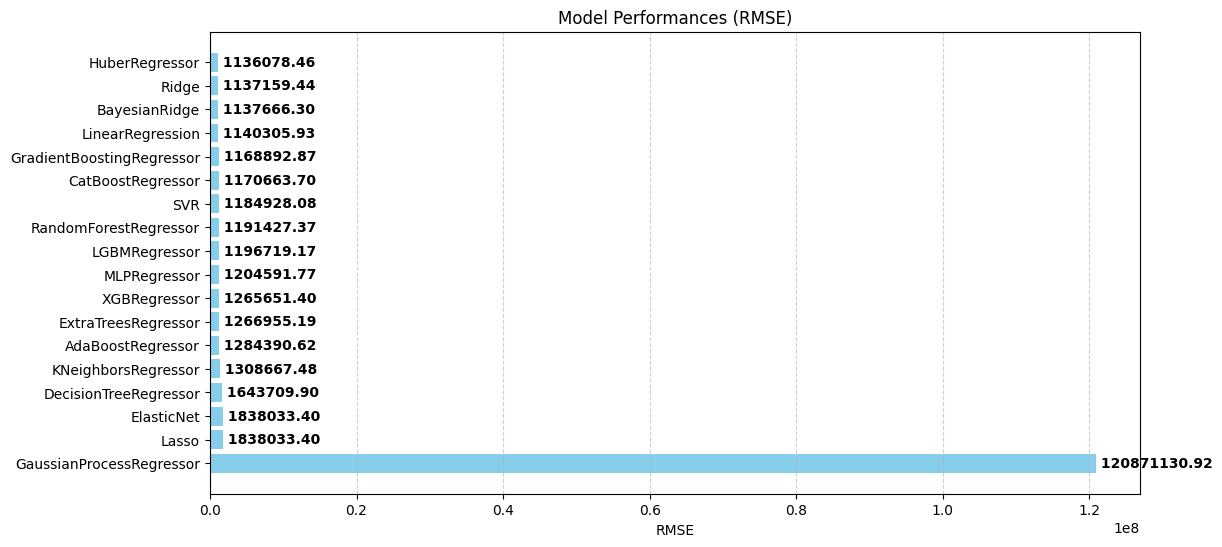

In [27]:

# Sort the results DataFrame by RMSE (or any other metric)
sorted_results_df = results_df.sort_values(by='RMSE')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(sorted_results_df.index, sorted_results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.title('Model Performances (RMSE)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the bars with RMSE values
for i, v in enumerate(sorted_results_df['RMSE']):
    plt.text(v, i, f' {v:.2f}', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()


### Spider Plot

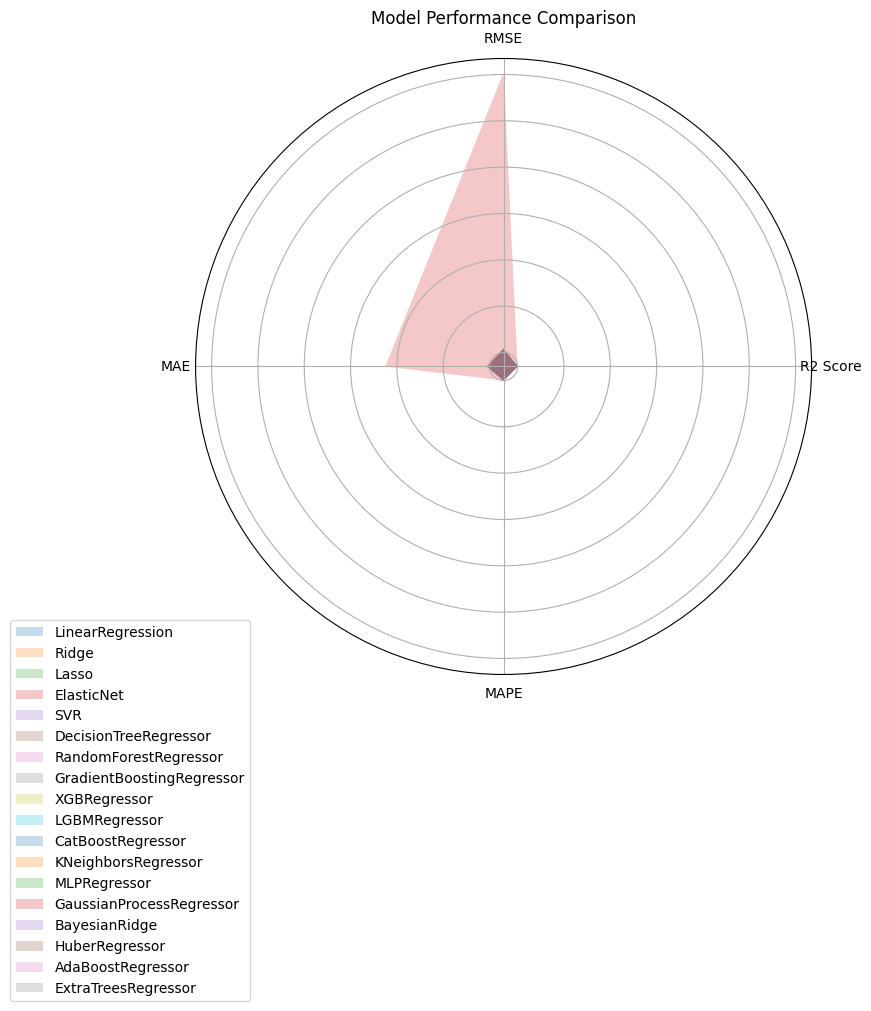

In [29]:


# Define the metrics to be plotted
metrics = ['R2 Score', 'RMSE', 'MAE', 'MAPE']

# Create a list of model names
model_names = results_df.index

# Create a figure with a polar projection
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Set the number of metrics
num_metrics = len(metrics)

# Create an array of angles for each metric
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]

# Plot each model's performance on the radar plot
for i, (model, values) in enumerate(results_df.iterrows()):
    performance = values[metrics].values.tolist()
    performance += performance[:1]
    ax.fill(angles, performance, alpha=0.25, label=model)

# Set the labels for each axis (metrics)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticklabels([])  # Hide radial labels

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add a title
plt.title('Model Performance Comparison')

# Show the radar plot
plt.show()


C:\Users\rupes\AppData\Local\Temp\ipykernel_11472\3258226771.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')
C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


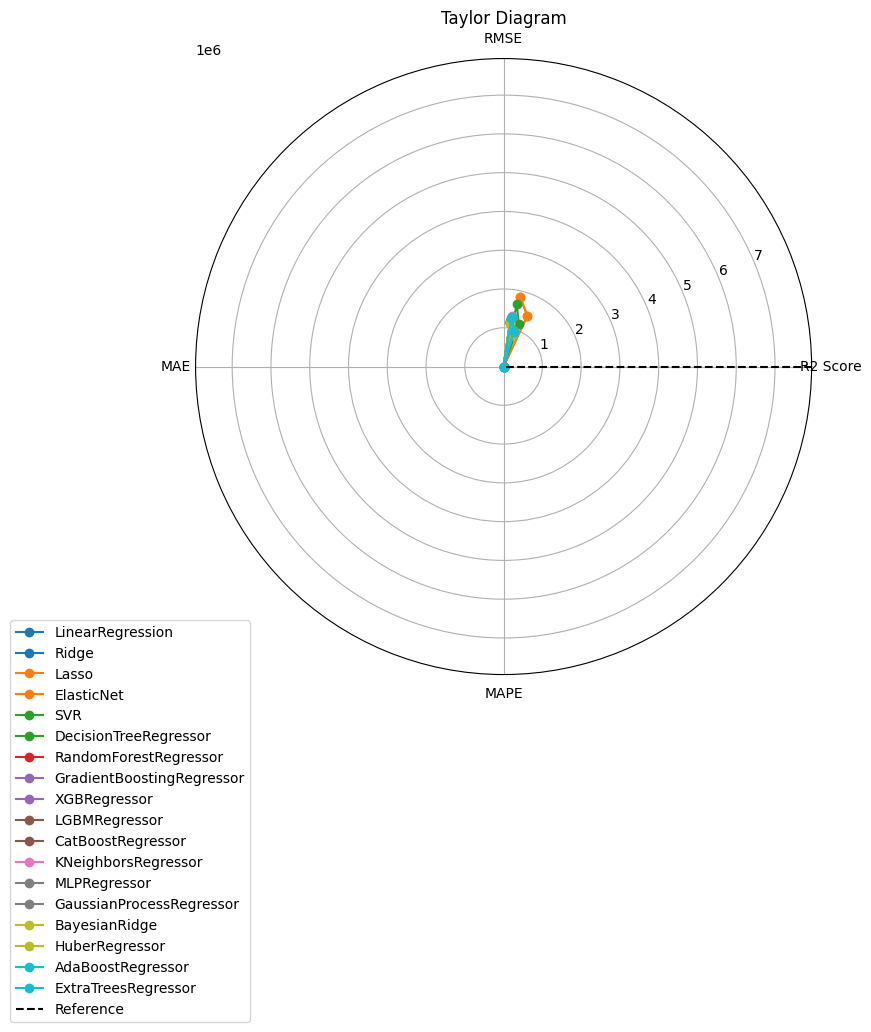

In [32]:

from matplotlib.cm import get_cmap


# Define the metrics to be used in the Taylor Diagram
metrics = ['R2 Score', 'RMSE', 'MAE', 'MAPE']

# Extract the model names and performance metrics from the results DataFrame
model_names = results_df.index
model_metrics = results_df[metrics]

# Create a reference dataset (e.g., the mean performance across all models)
reference = model_metrics.mean()

# Calculate standard deviations for each metric
std_dev = model_metrics.std()

# Create a Taylor Diagram
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
ax.set_ylim(0, max(reference))

# Use a color map to automatically assign colors to models
cmap = get_cmap('tab10')
colors = cmap(np.linspace(0, 1, len(model_names)))

for i, model in enumerate(model_names):
    model_data = model_metrics.loc[model].values
    ax.plot(np.arccos(model_data / reference), model_data, 'o-', color=colors[i], label=model)

ax.plot(np.arccos(reference / reference), reference, 'k--', label='Reference')

# Add labels and legend
ax.set_xticks(np.linspace(0, 2 * np.pi, len(metrics) + 1)[:-1])
ax.set_xticklabels(metrics)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add a title
plt.title('Taylor Diagram')

plt.show()


C:\Users\rupes\AppData\Local\Temp\ipykernel_11472\3698190595.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')
C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


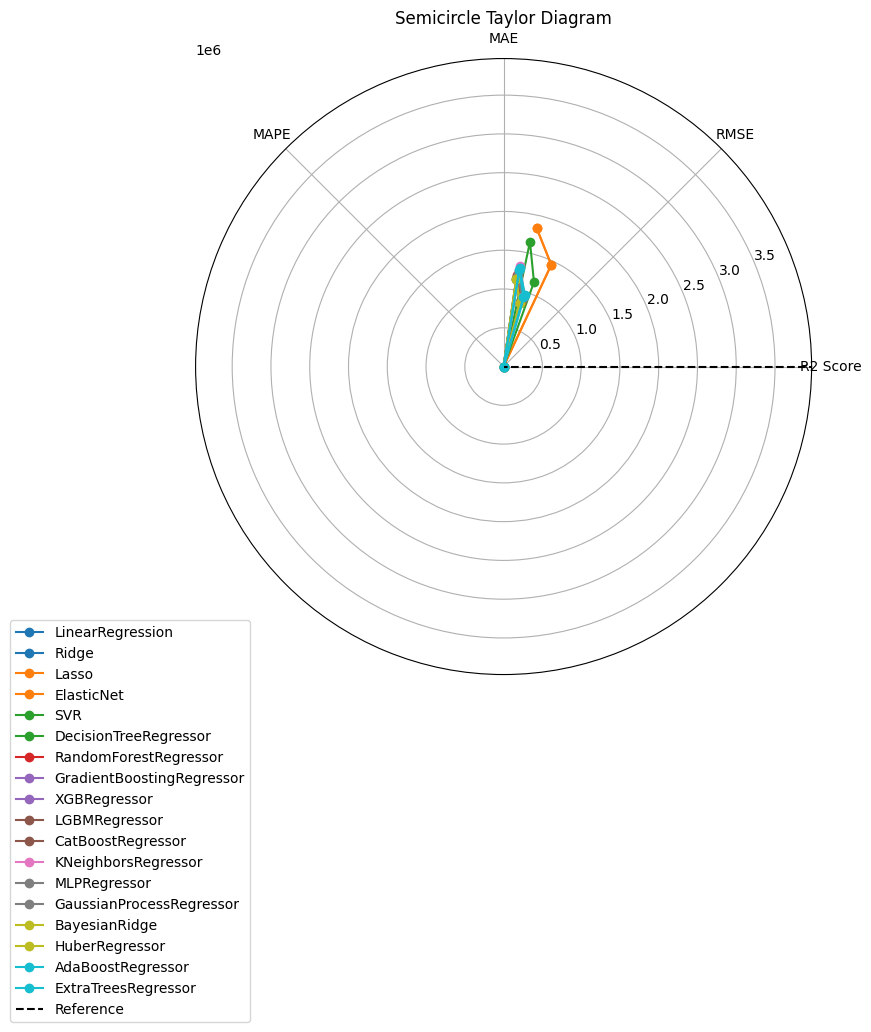

In [33]:

from matplotlib.cm import get_cmap



# Define the metrics to be used in the Taylor Diagram
metrics = ['R2 Score', 'RMSE', 'MAE', 'MAPE']

# Extract the model names and performance metrics from the results DataFrame
model_names = results_df.index
model_metrics = results_df[metrics]

# Create a reference dataset (e.g., the mean performance across all models)
reference = model_metrics.mean()

# Calculate standard deviations for each metric
std_dev = model_metrics.std()

# Create a semicircle Taylor Diagram
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Set the ylim to be half of the maximum value in the reference dataset
ax.set_ylim(0, max(reference) / 2)

# Use a color map to automatically assign colors to models
cmap = get_cmap('tab10')
colors = cmap(np.linspace(0, 1, len(model_names)))

for i, model in enumerate(model_names):
    model_data = model_metrics.loc[model].values
    ax.plot(np.arccos(model_data / reference), model_data, 'o-', color=colors[i], label=model)

ax.plot(np.arccos(reference / reference), reference, 'k--', label='Reference')

# Add labels and legend
ax.set_xticks(np.linspace(0, np.pi, len(metrics) + 1)[:-1])
ax.set_xticklabels(metrics)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add a title
plt.title('Semicircle Taylor Diagram')

# Show the semicircle Taylor Diagram
plt.show()


# Select the model based on lowest RMSE

In [26]:

# Select the model with the lowest RMSE 
best_model = results_df['RMSE'].idxmin()

print("The best model based on RMSE is:", best_model)
# Find the row corresponding to the best model in the results DataFrame
best_model_metrics = results_df.loc[best_model]

# Print all metrics for the best model
print("Metrics for the best model:")
print(best_model_metrics)


The best model based on RMSE is: HuberRegressor
Metrics for the best model:
R2 Score    5.792402e-01
RMSE        1.136078e+06
MAE         8.409576e+05
MAPE        1.831711e-01
Name: HuberRegressor, dtype: float64


# Feature Importance Analysis

* Feature importance scores are used to determine the relative importance of each feature in a dataset when building a predictive model. These scores are calculated using a variety of techniques, such as decision trees, random forests, linear models, and neural networks. 


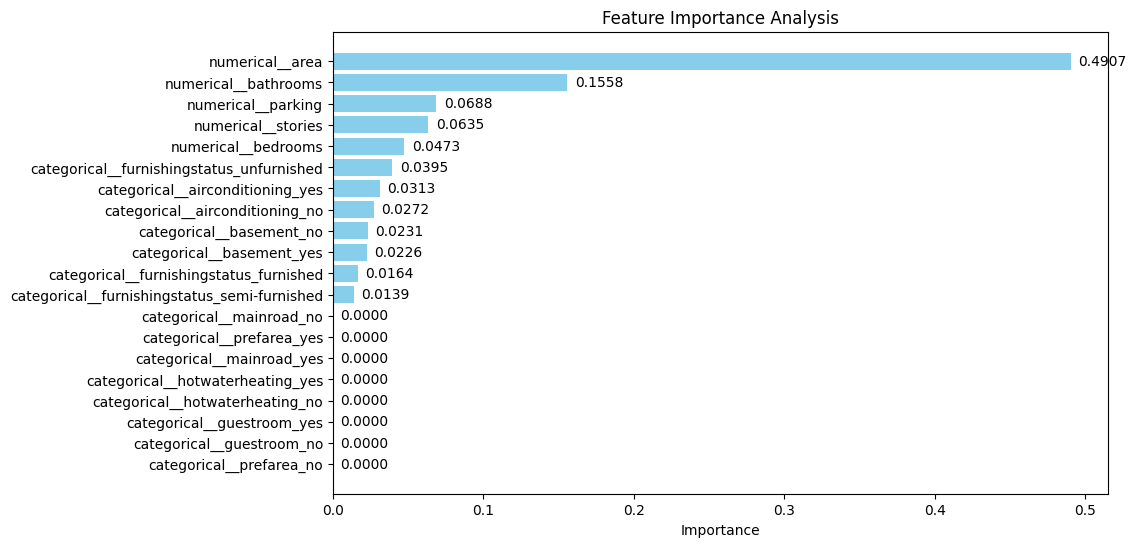

In [35]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

# Display the importance values at the end of each bar
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{importance:.4f}', ha='left', va='center', fontsize=10)

plt.xlabel('Importance')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()
